In [2]:
import numpy as np
import os, glob
import matplotlib.pyplot as plt
import mplhep as hep
plt.style.use([hep.style.ROOT, hep.style.firamath])
import pickle, glob
import matplotlib.colors as mcolors
from matplotlib.colors import LinearSegmentedColormap
channel_list = ["Tracks_pt", "Tracks_dZSig", "Tracks_d0Sig", "ECAL_energy",
"HBHE_energy", "Pix_1", "Pix_2", "Pix_3", "Pix_4", "Tib_1", "Tib_2",
"Tib_3", "Tib_4", "Tob_1", "Tob_2", "Tob_3", "Tob_4", "Tob_5",
"Tob_6", "Tid_1", "Tec_1", "Tec_2", "Tec_3"]
# %matplotlib notebook
from scipy.stats import norm
# Define the CMS color scheme
cms_colors = [
    (0.00, '#FFFFFF'),  # White
    (0.33, '#005EB8'),  # Blue
    (0.66, '#FFDD00'),  # Yellow
    (1.00, '#FF0000')   # red
]

# Create the CMS colormap
cms_cmap = LinearSegmentedColormap.from_list('CMS', cms_colors)
import math

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

m0_scale    = 14
m0_min      = 3.6
m0_max      = 14.8
mtrue_bins = np.arange(m0_min, m0_max, .4)
mae_min  =0
mae_max  = 10.5
mae_bins = np.arange(mae_min, mae_max, .5)
mre_bins = np.arange(0, 1.05, .05)
mass_bins = np.arange(3600,14000,400)/1000.

out_dir='plots'
if not os.path.isdir(out_dir):
    os.makedirs(out_dir)
save = True

In [2]:
valid_data = glob.glob("/pscratch/sd/b/bbbam/resnet34_modified_final/13_channels_massregressor_multi_node_2024_07_12_07_00/val*")
print("Total epoch hit:  ", len(valid_data))

Total epoch hit:   300


In [3]:
# !ls /pscratch/sd/b/bbbam/eff0_Nodes_4.0/13_channels_massregressor_multi_node_2024_07_17_14:10:18_GPUS_16/valid_data_epoch_1

112 files found


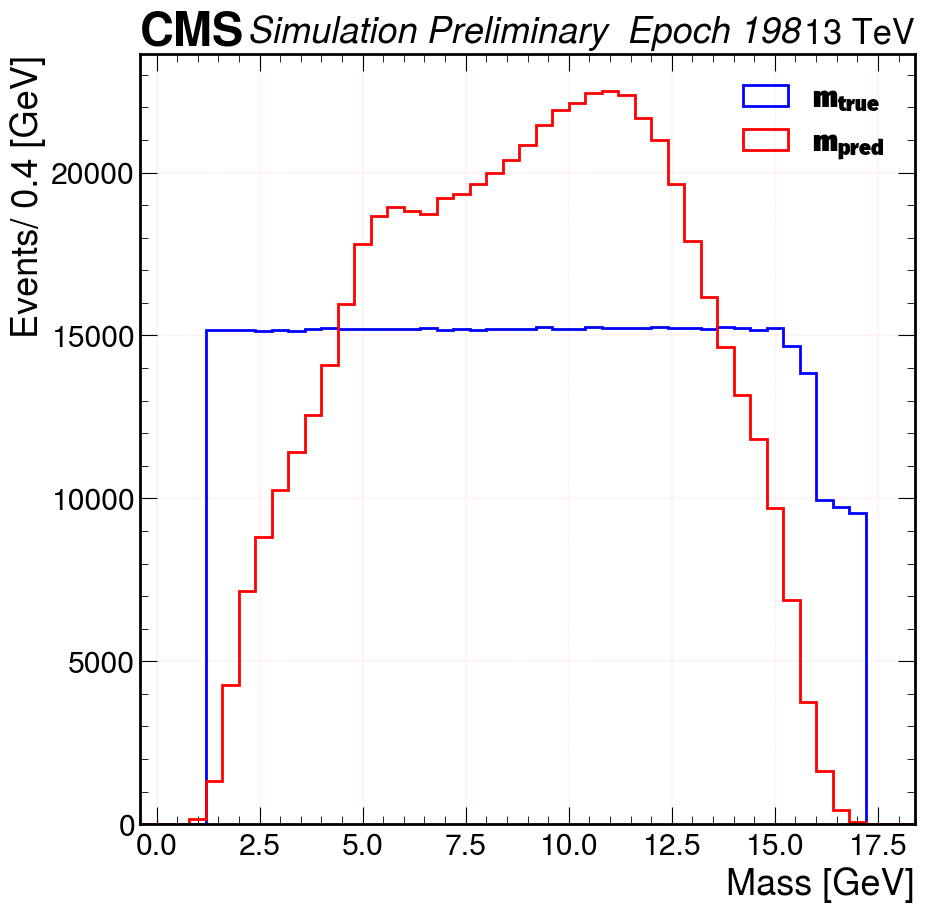

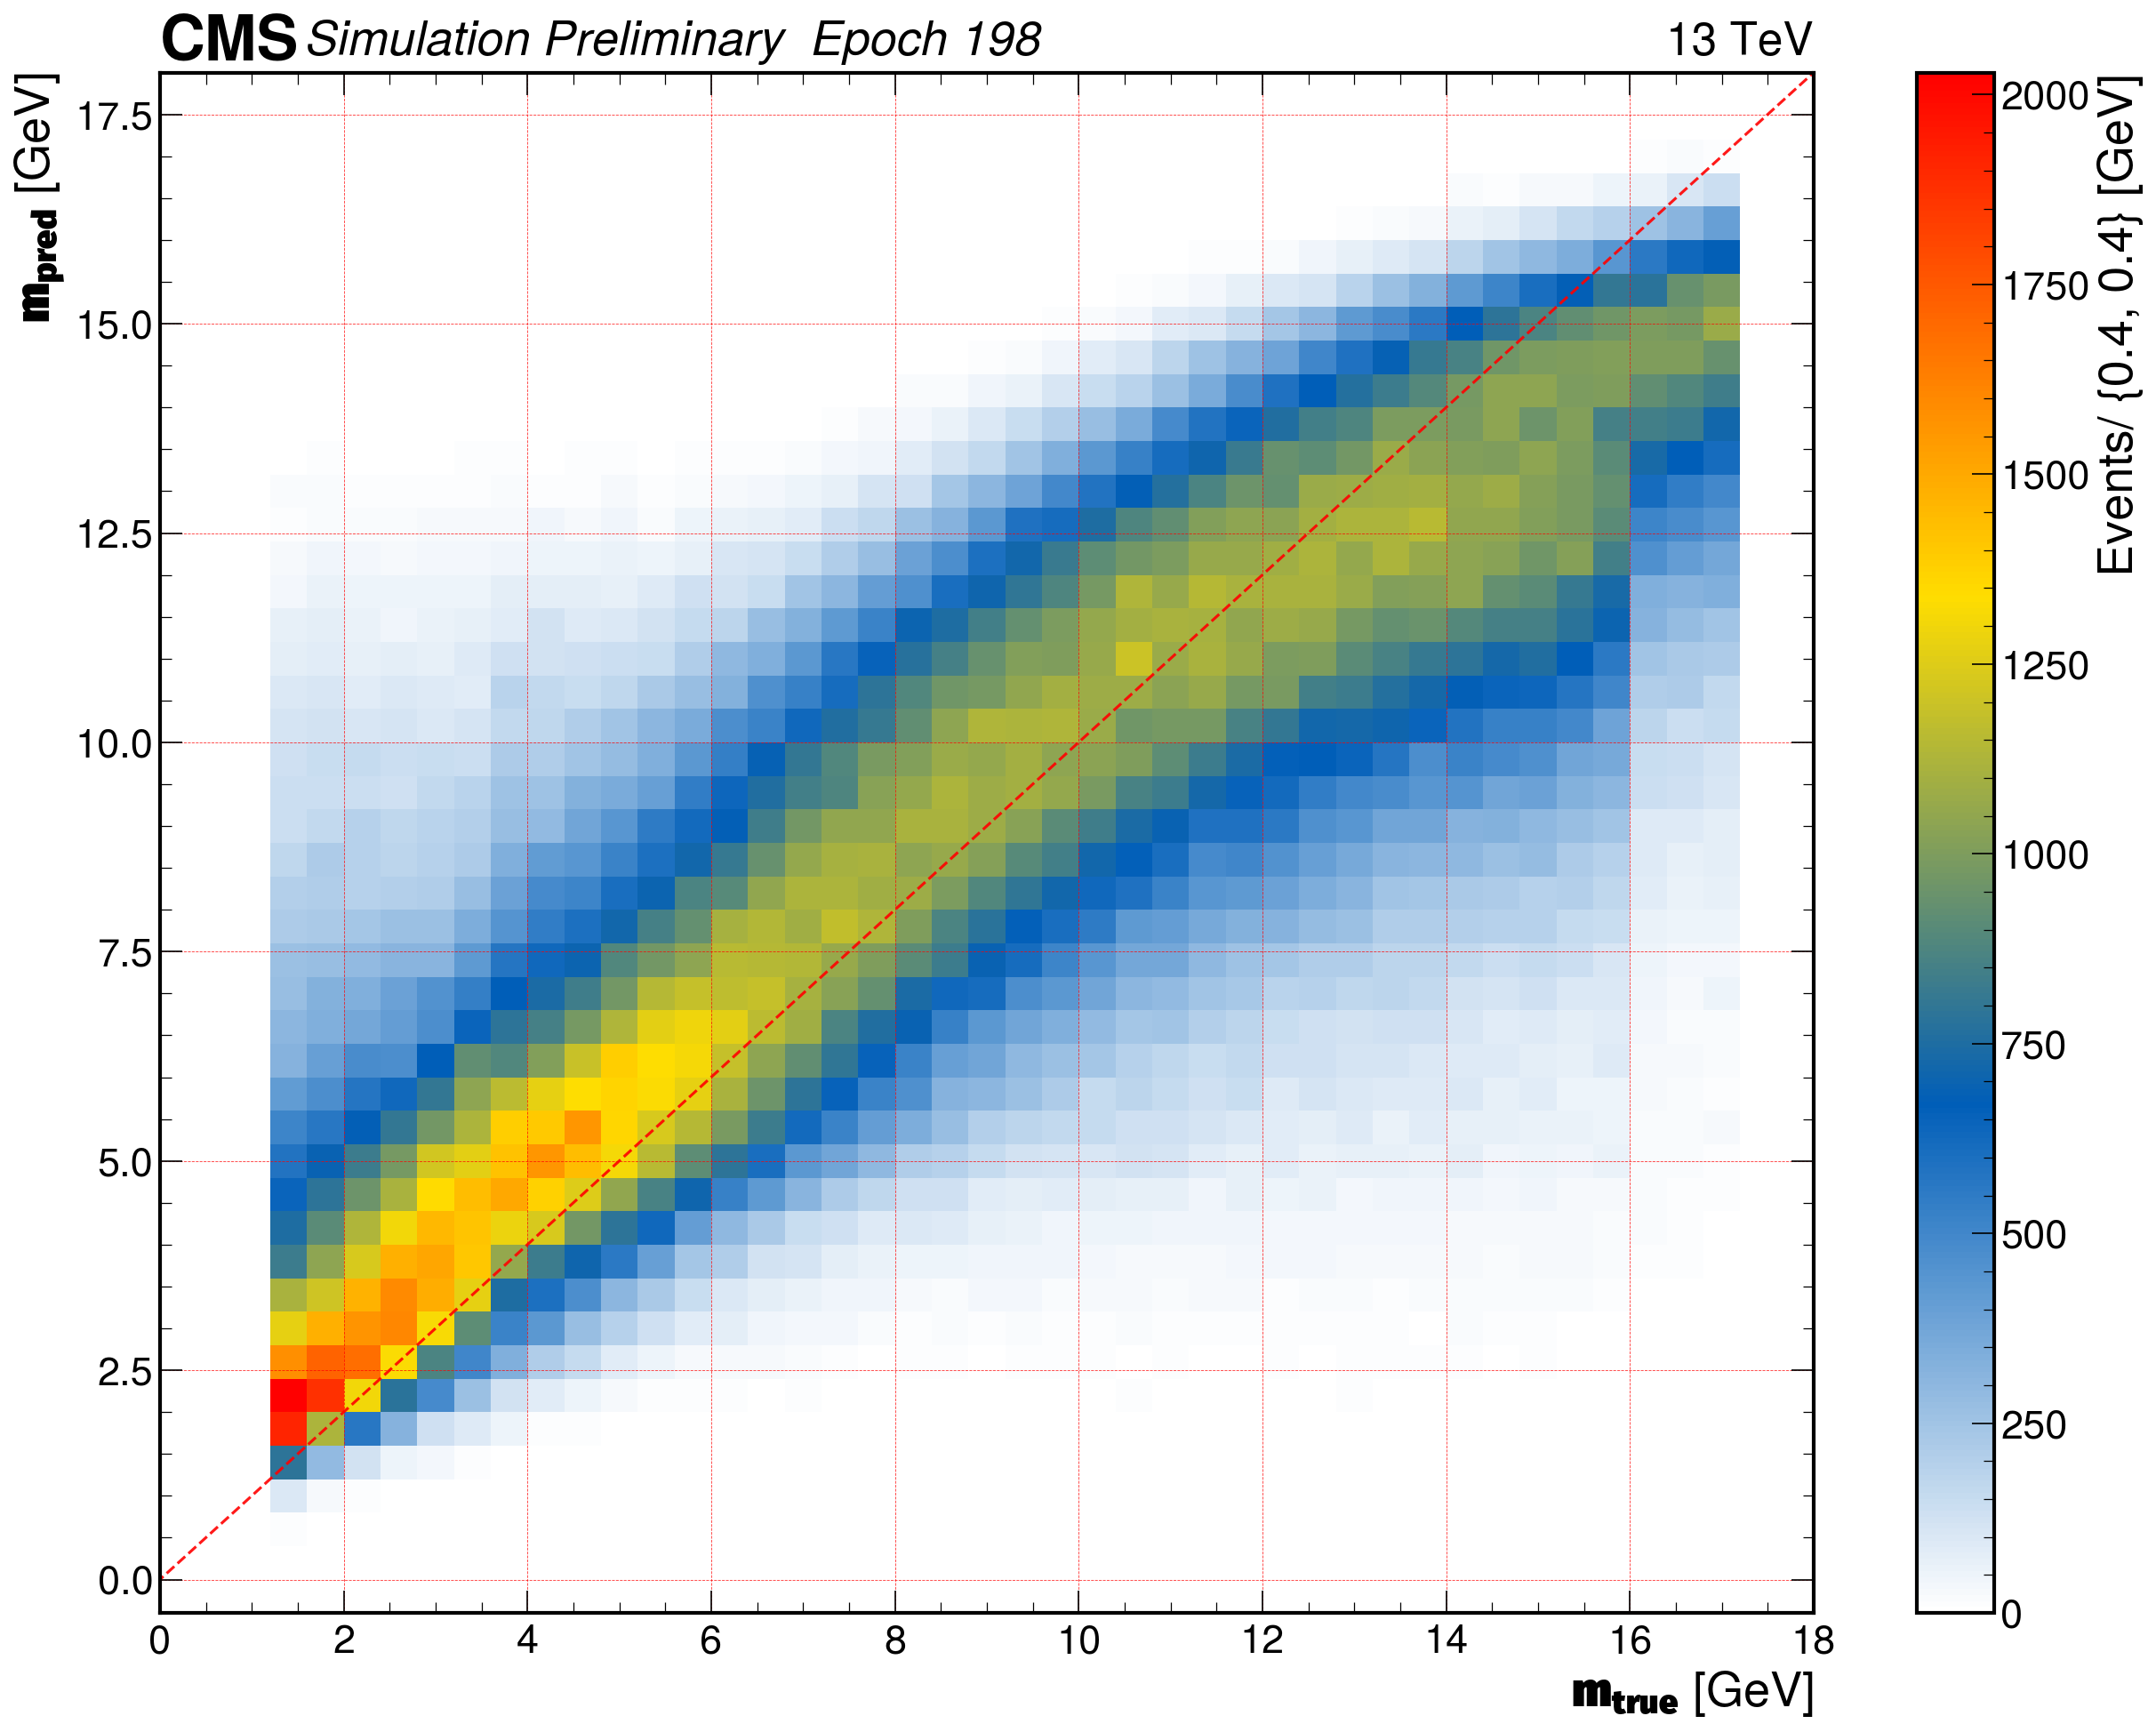

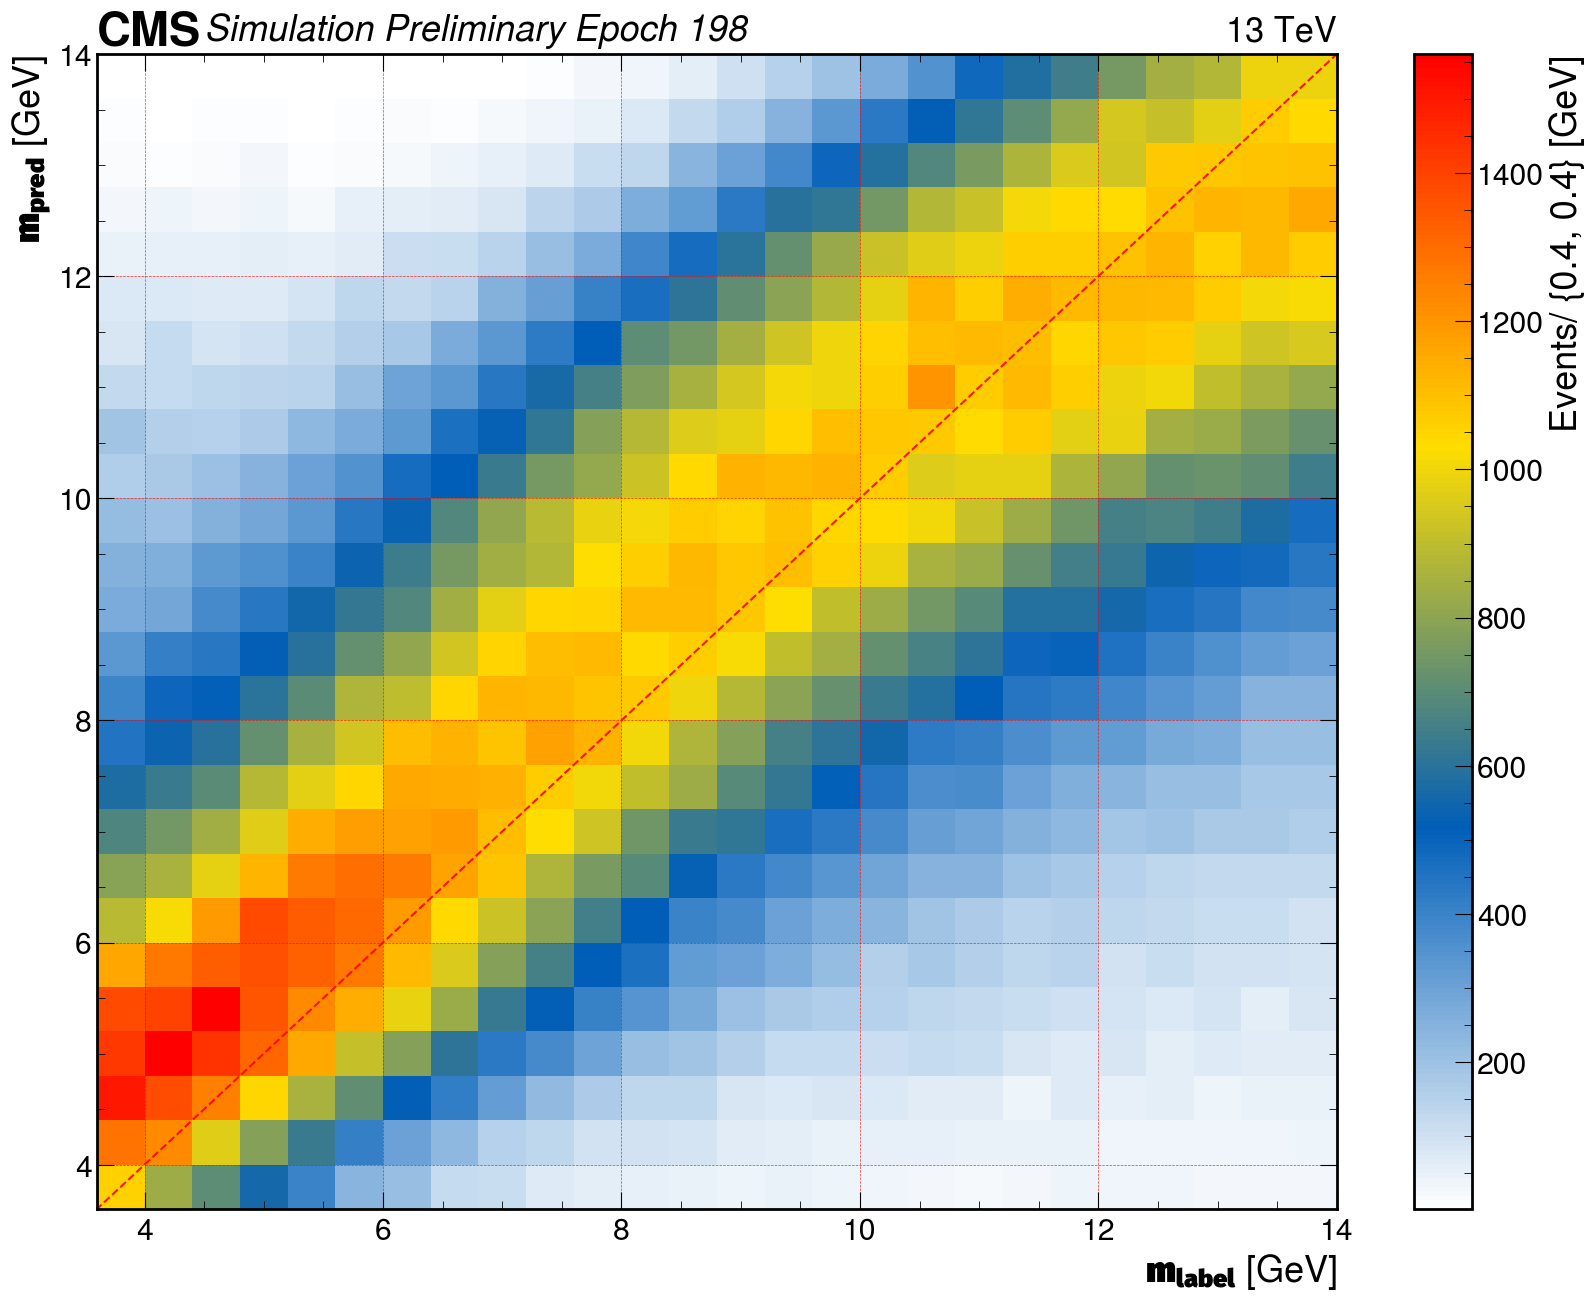

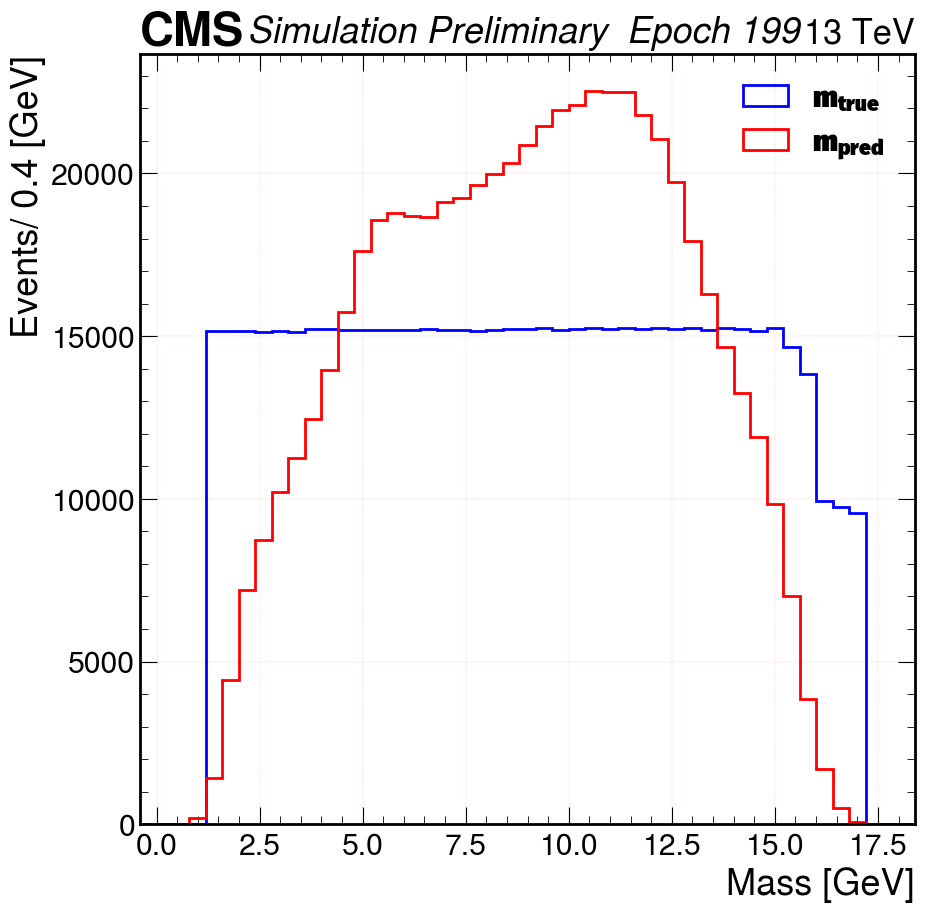

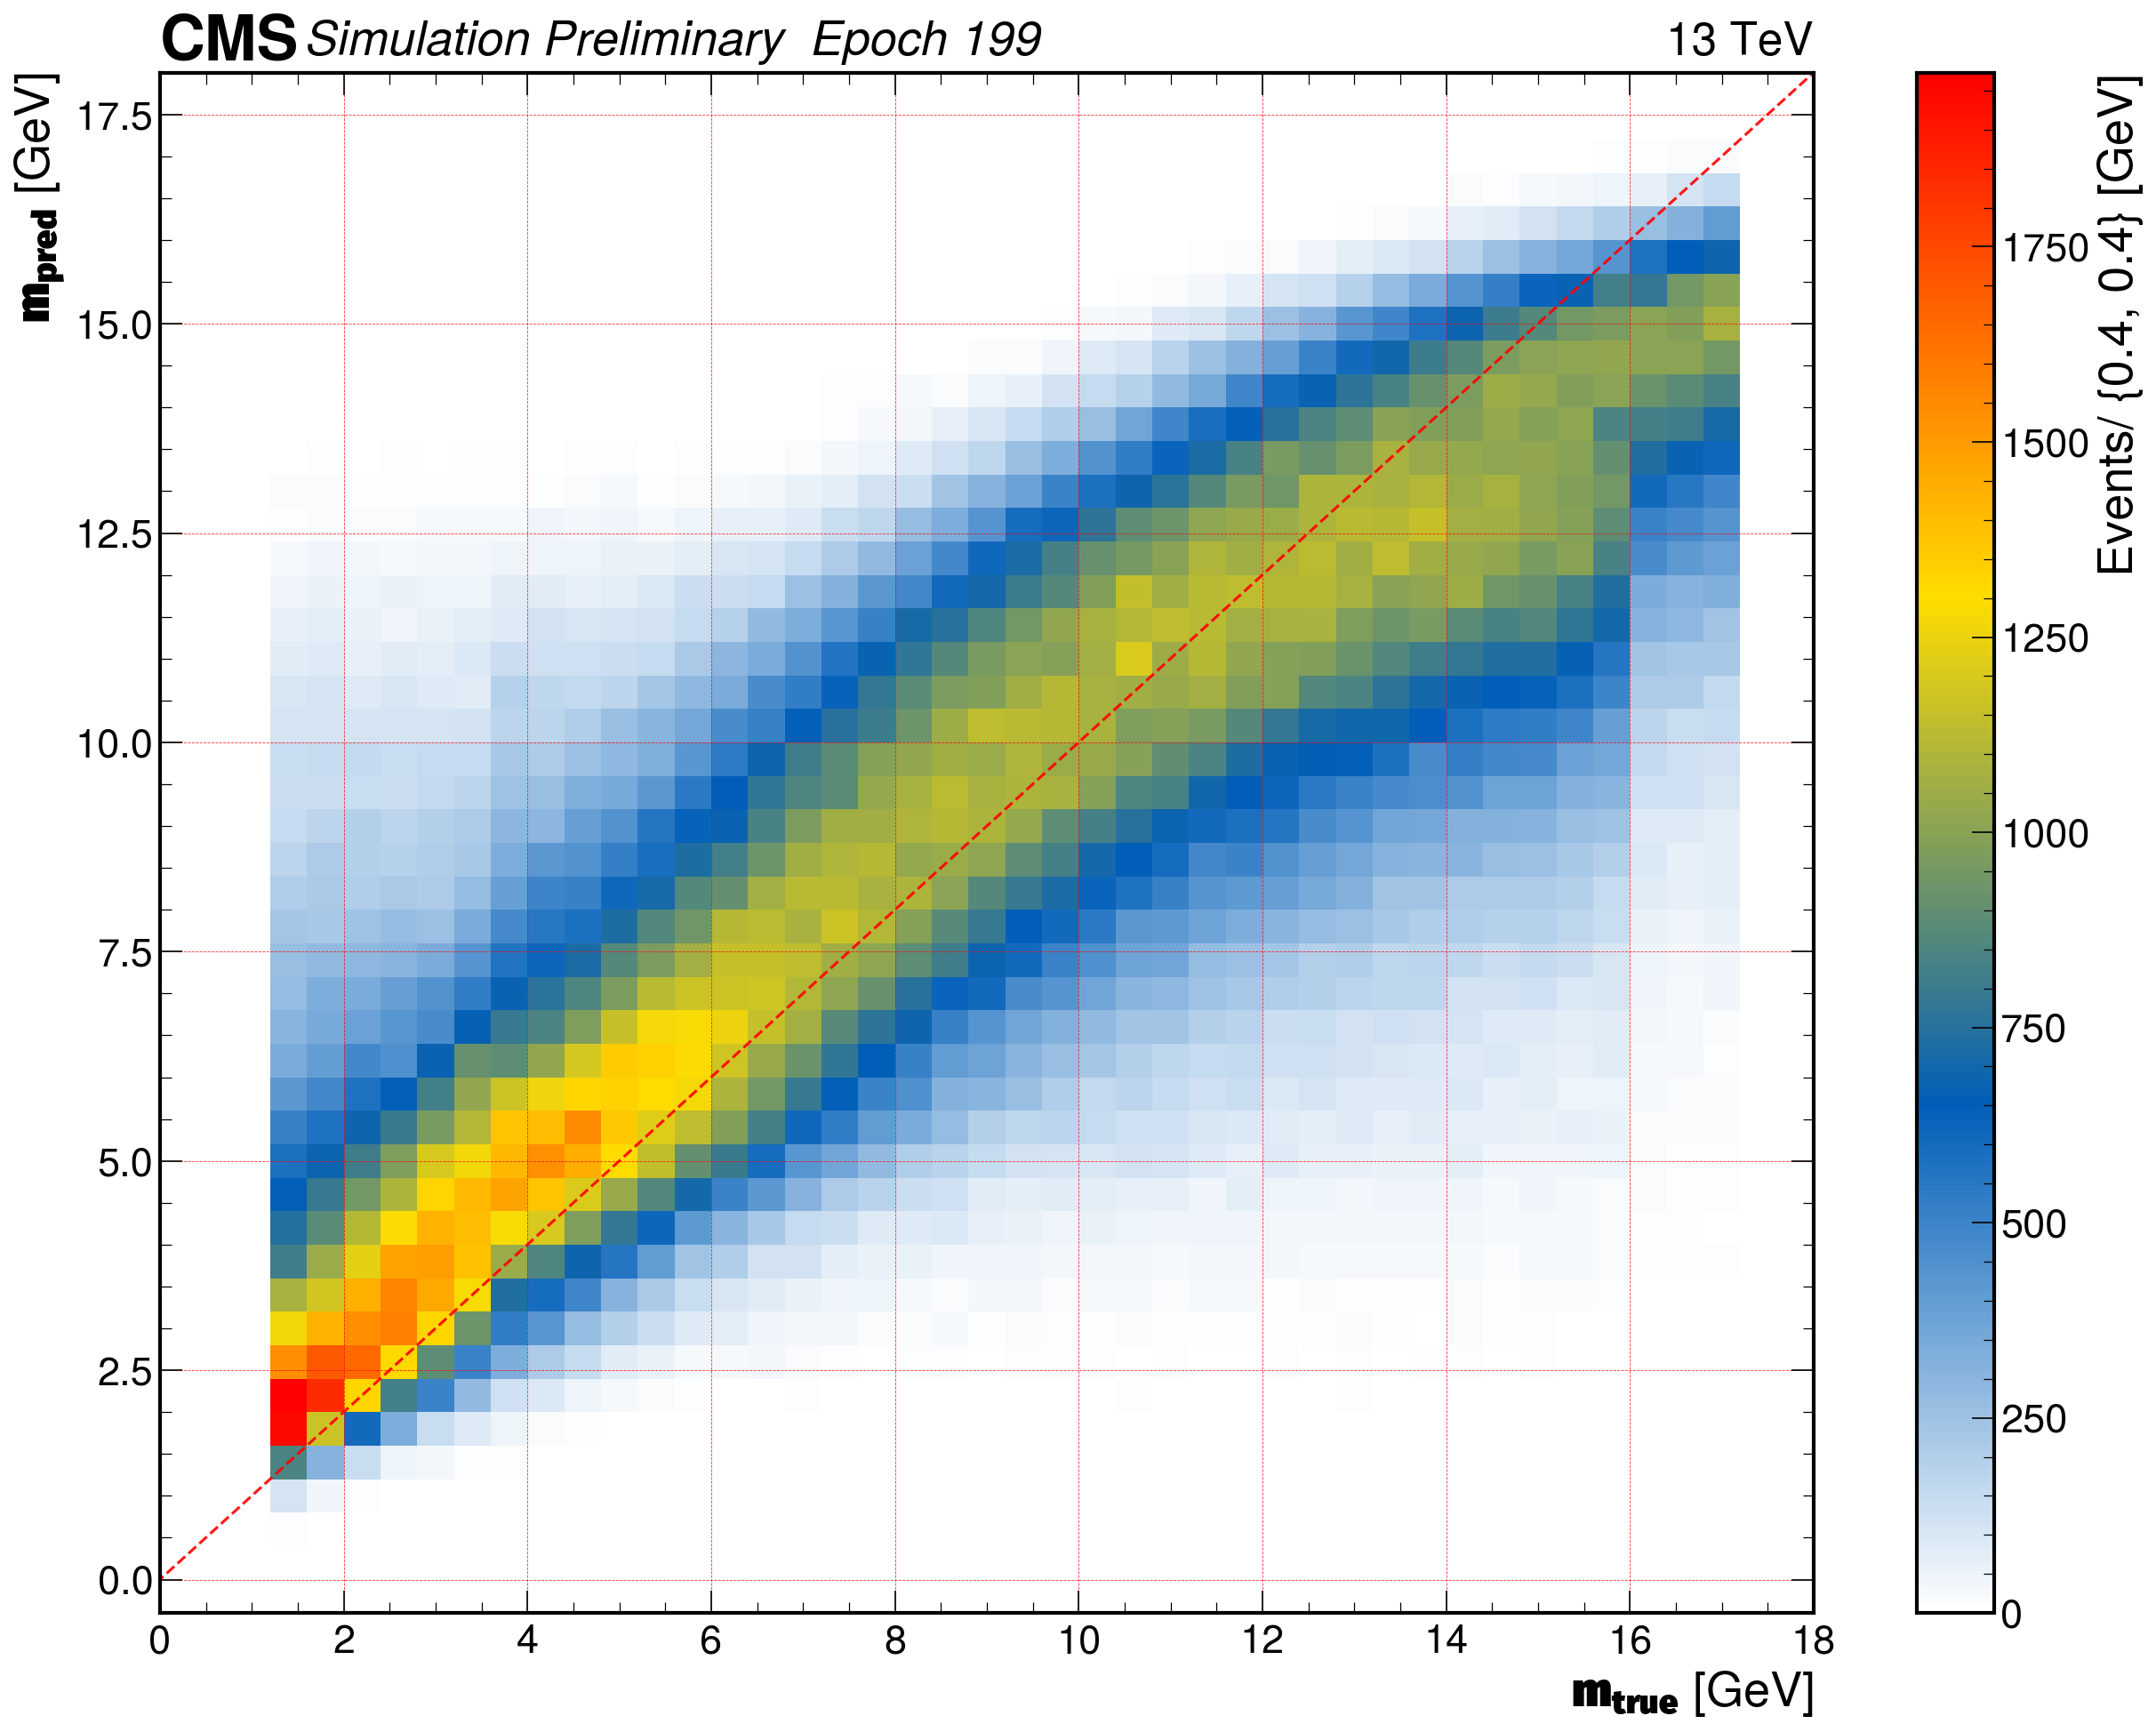

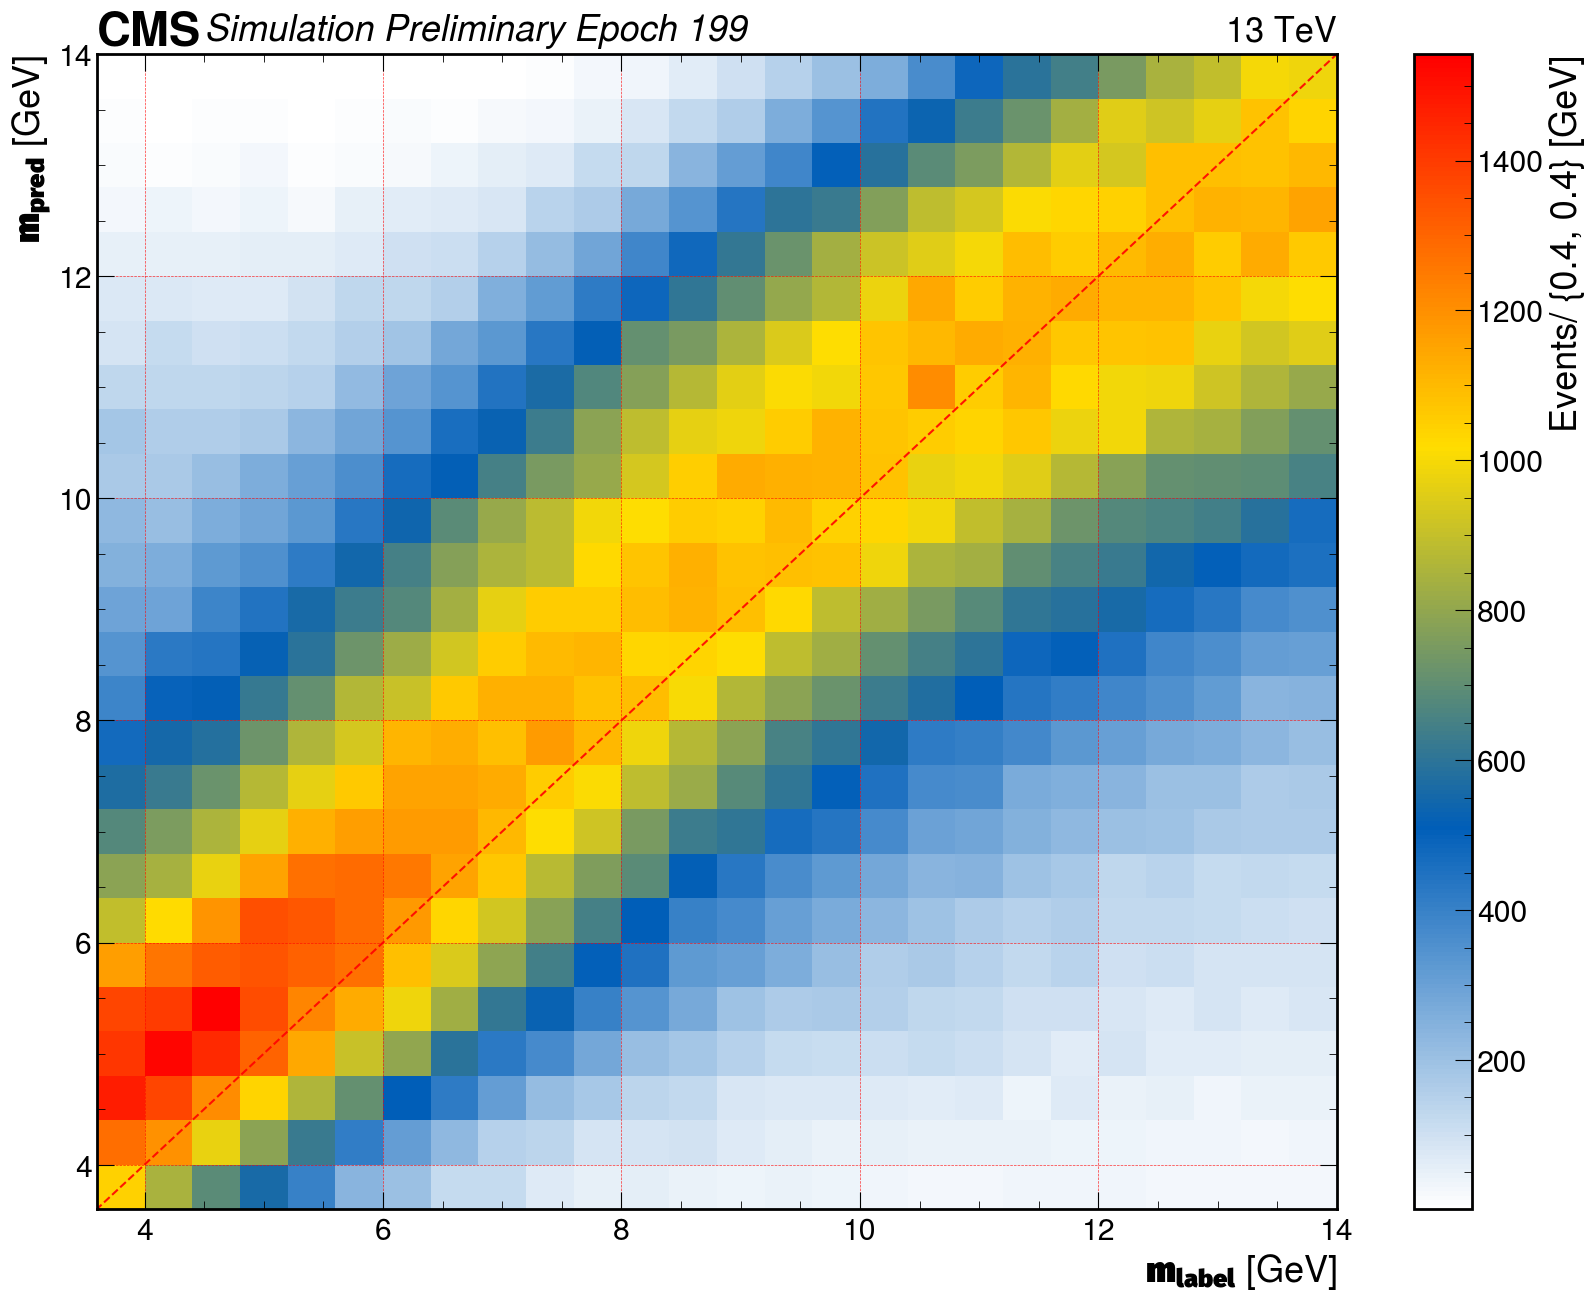

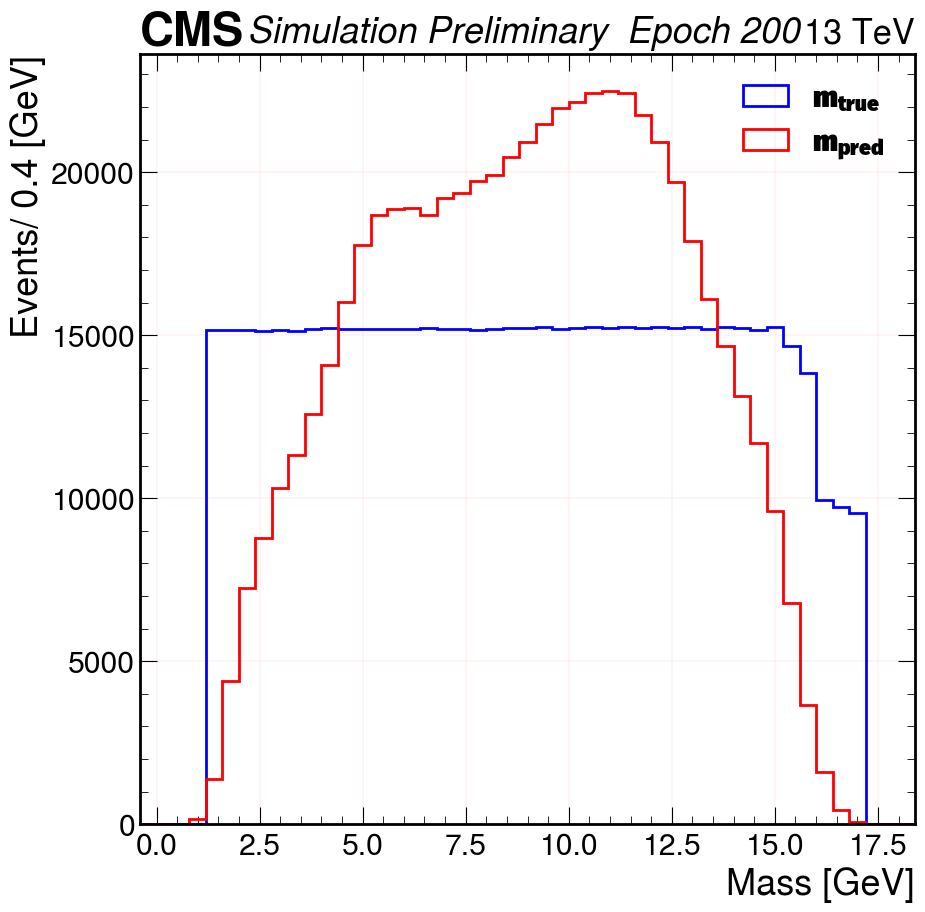

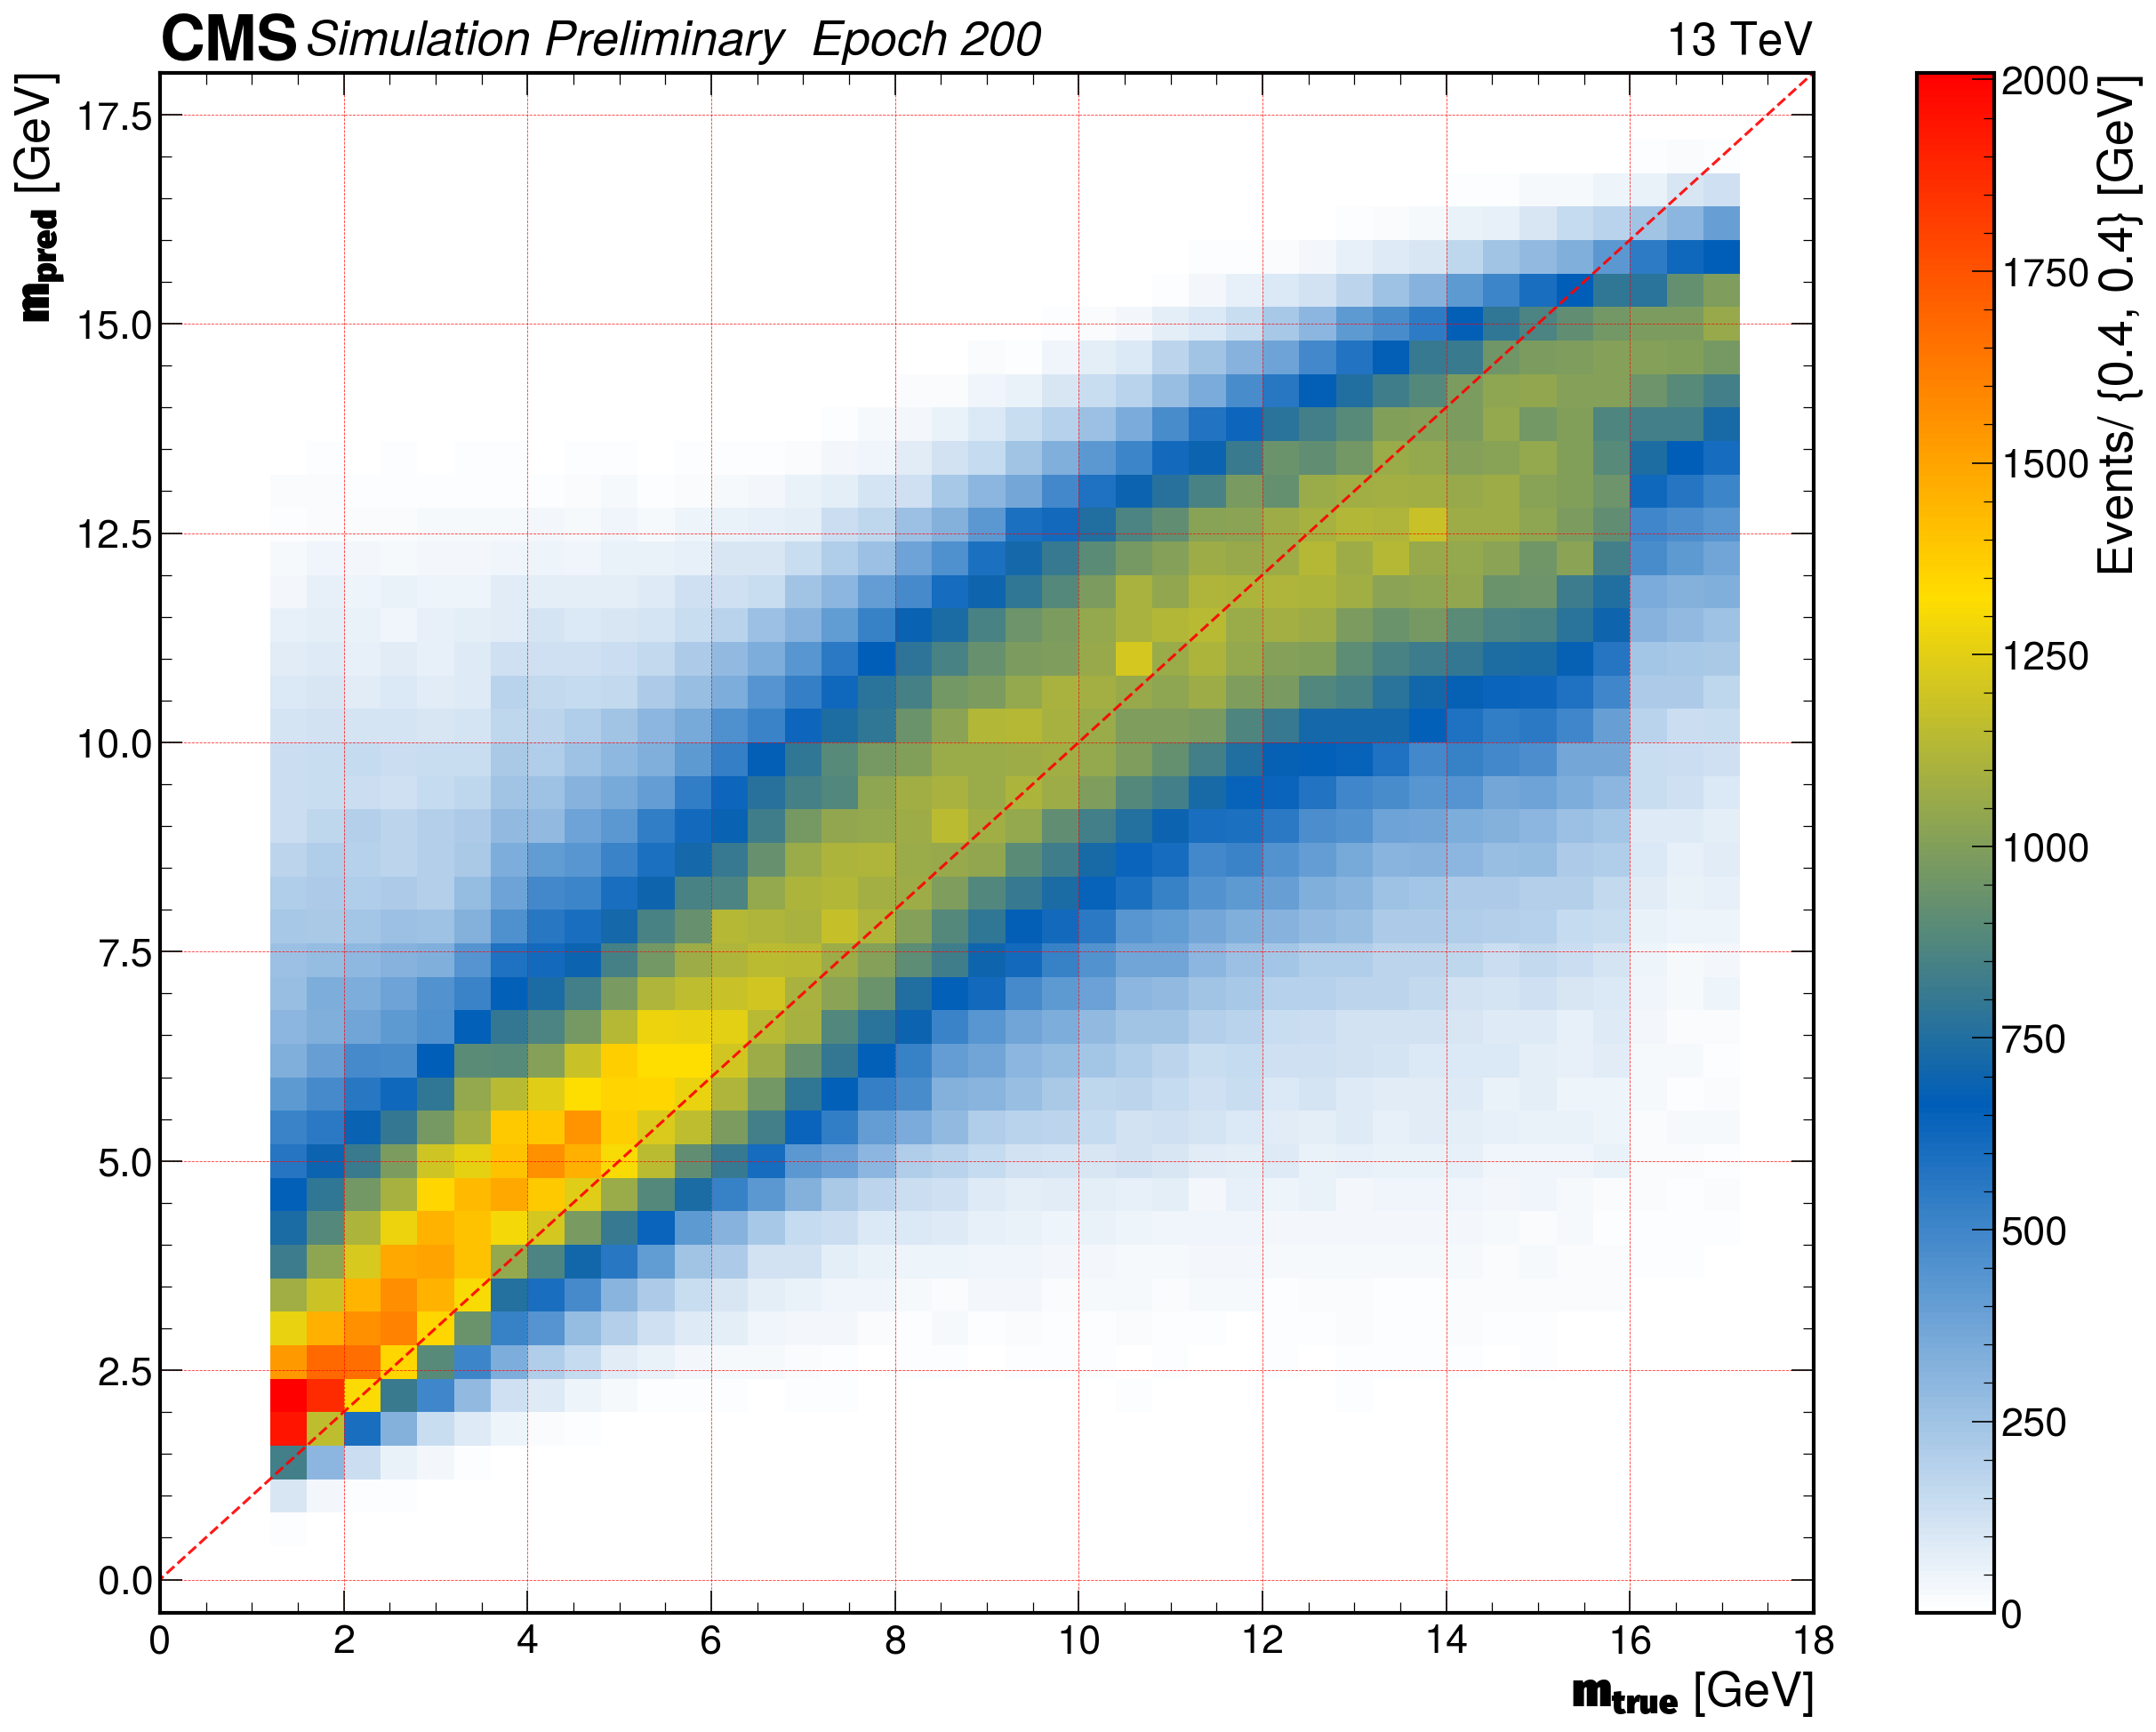

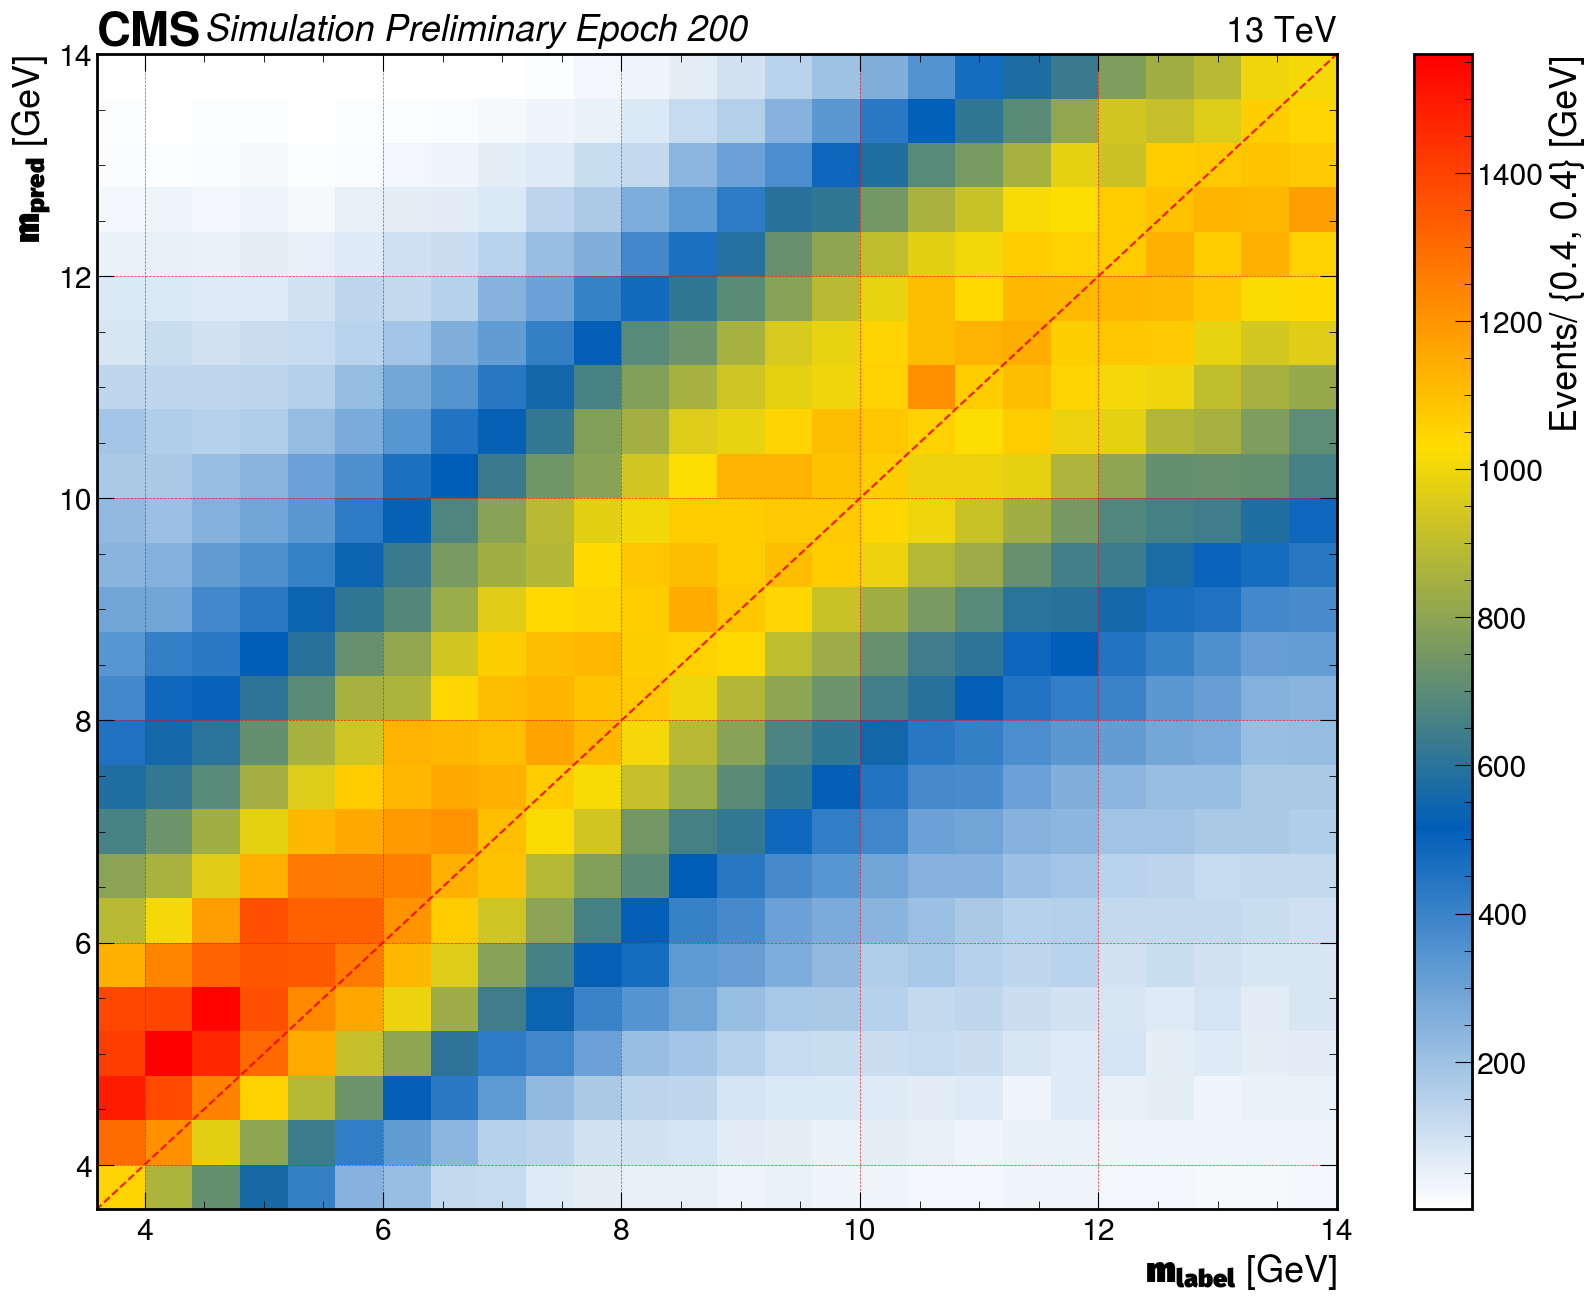

In [11]:
paths='/pscratch/sd/b/bbbam/ResNet_old_no_ep_Nodes_4.0/13_channels_massregressor_multi_node_2024_07_26_20:51:58_GPUS_16'
assert len(paths) > 0
print(f"{len(paths)} files found")


# for epoch in range(len(paths)):
for epoch in range(198,201):
    m_true_ =[]
    m_pred_ =[]
    data = glob.glob(f"{paths}/valid_data_epoch_{epoch}/Inference_data_valid*")
    for data_file in data:
        # print(data)
        infile = open(f"{data_file}", "rb")
        data = pickle.load(infile)
        infile.close()

        m_true_.append(data["m_true"])
        m_pred_.append(data["m_pred"])
    m_true_ = np.concatenate(m_true_)
    m_pred_ = np.concatenate(m_pred_)  
        
        
    m0_min = 0.8
    m0_max = 17.2
    bin_size = 0.4
    fig, ax = plt.subplots()
    plt.hist(m_true_, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,bin_size)), histtype='step', label=r'$\mathrm{m_{true}}$', linestyle='-', color='blue', linewidth=2)
    plt.hist(m_pred_, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,bin_size)), histtype='step', label=r'$\mathrm{m_{pred}}$', linestyle='-', color='red', linewidth=2)
    plt.xlim(m0_min-1.2,m0_max+1.2)
    # plt.xticks(np.arange(m0_min-1.2,m0_max+1.2,.8),)
    plt.grid(color='r', linestyle='--', linewidth=.1)
    plt.xlabel('Mass [GeV]')
    plt.ylabel('Events/ 0.4 [GeV]')
    # plt.title(r'$\mathrm{m_{true}}$, $\mathrm{m_{pred}}$ masses',size=25)
    plt.legend(loc='upper right')
    hep.cms.label(llabel=f"Simulation Preliminary  Epoch {epoch}", rlabel="13 TeV", loc=0, ax=ax)
    # plt.savefig('%s/%d_mtru_mpred_hist_full.png'%(out_dir, epoch), bbox_inches='tight',dpi=300, facecolor = "w")
    plt.show()

    
    
    # fig, ax = plt.subplots()
    # plt.hist(m_true_, range=(3.6-1.2,14+1.2), bins=len(np.arange(3.6-1.2,14+1.2,bin_size)), histtype='step', label=r'$\mathrm{m_{true}}$', linestyle='-', color='blue', linewidth=2)
    # plt.hist(m_pred_, range=(3.6-1.2,14+1.2), bins=len(np.arange(3.6-1.2,14+1.2,bin_size)), histtype='step', label=r'$\mathrm{m_{pred}}$', linestyle='-', color='red', linewidth=2)
    # # plt.xlim(m0_min-1.2,m0_max+1.2)
    # # plt.xticks(np.arange(m0_min-1.2,m0_max+1.2,.8),)
    # plt.grid(color='r', linestyle='--', linewidth=.1)
    # plt.xlabel('Mass [GeV]')
    # plt.ylabel('Events/ 0.4 [GeV]')
    # # plt.title(r'$\mathrm{m_{true}}$, $\mathrm{m_{pred}}$ masses',size=25)
    # plt.legend(loc='upper right')
    # hep.cms.label(llabel=f"Simulation Preliminary  Epoch {epoch}", rlabel="13 TeV", loc=0, ax=ax)
    # # plt.savefig('%s/%d_mtru_mpred_hist_full.png'%(out_dir, epoch+1), bbox_inches='tight',dpi=300, facecolor = "w")
    # plt.show()

    # Extended version
    fig, ax = plt.subplots(figsize=(20,15), dpi=150)
    plt.hist2d(np.squeeze(m_true_), np.squeeze(m_pred_), bins=[np.arange(m0_min-0.8, m0_max+1.2, .4), np.arange(m0_min-1.2, m0_max+1.2, .4)],cmap=cms_cmap)
    plt.xlabel(r'$\mathrm{m_{true}}$ [GeV]')
    plt.ylabel(r'$\mathrm{m_{pred}}$ [GeV]')
    plt.plot((m0_min-1.2, m0_max+1.2), (m0_min-1.2, m0_max+1.2), color='r', linestyle='--', alpha=0.9)
    # plt.xticks(np.arange(m0_min-0.8, m0_max+1.2, .8),size=15)
    # plt.yticks(np.arange(m0_min-1.2, m0_max+1.2, .8),size=15)
    plt.colorbar().set_label(label='Events/ {0.4, 0.4} [GeV]' )
    plt.grid(color='r', linestyle='--', linewidth=.4)
    hep.cms.label(llabel=f"Simulation Preliminary  Epoch {epoch}", rlabel="13 TeV", loc=0, ax=ax)
    # plt.savefig('%s/%d_mtrue_mpred_2D_hist_full.png'%(out_dir, epoch), bbox_inches='tight',dpi=300, facecolor = "w")
    plt.show()

    # Truncated version
    fig, ax = plt.subplots(figsize=(20,15))
    hist = plt.hist2d(np.squeeze(m_true_), np.squeeze(m_pred_), bins=[np.arange(3.6, 14.1, .4), np.arange(3.6, 14.1, .4)],cmap=cms_cmap)
    plt.xlabel(r'$\mathrm{m_{label}}$ [GeV]')
    plt.ylabel(r'$\mathrm{m_{pred}}$ [GeV]')
    plt.plot((m0_min, m0_max), (m0_min, m0_max), color='r', linestyle='--', alpha=0.9)
    # plt.xticks(np.arange(3.6, 14.1, .8),size=15)
    # plt.yticks(np.arange(3.6, 14.1, .8),size=15)
    plt.colorbar().set_label(label='Events/ {0.4, 0.4} [GeV]')
    plt.grid(color='r', linestyle='--', linewidth=.5)

    hep.cms.label(llabel=f"Simulation Preliminary Epoch {epoch}", rlabel="13 TeV", loc=0, ax=ax)
    # plt.savefig('%s/%d_mtrue_mpred_2D_hist_truncated.png'%(out_dir, epoch),  bbox_inches='tight', dpi=300, facecolor = "w")
    plt.show()
    exit


### To test valid data split across multiple GPU

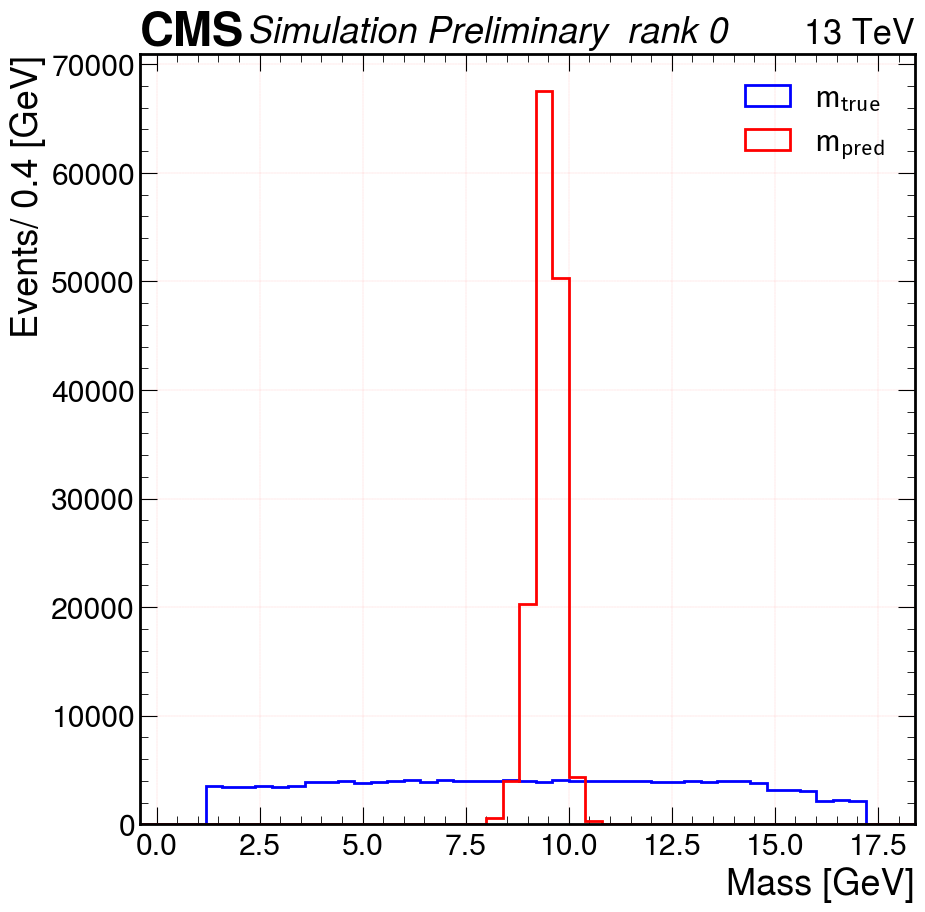

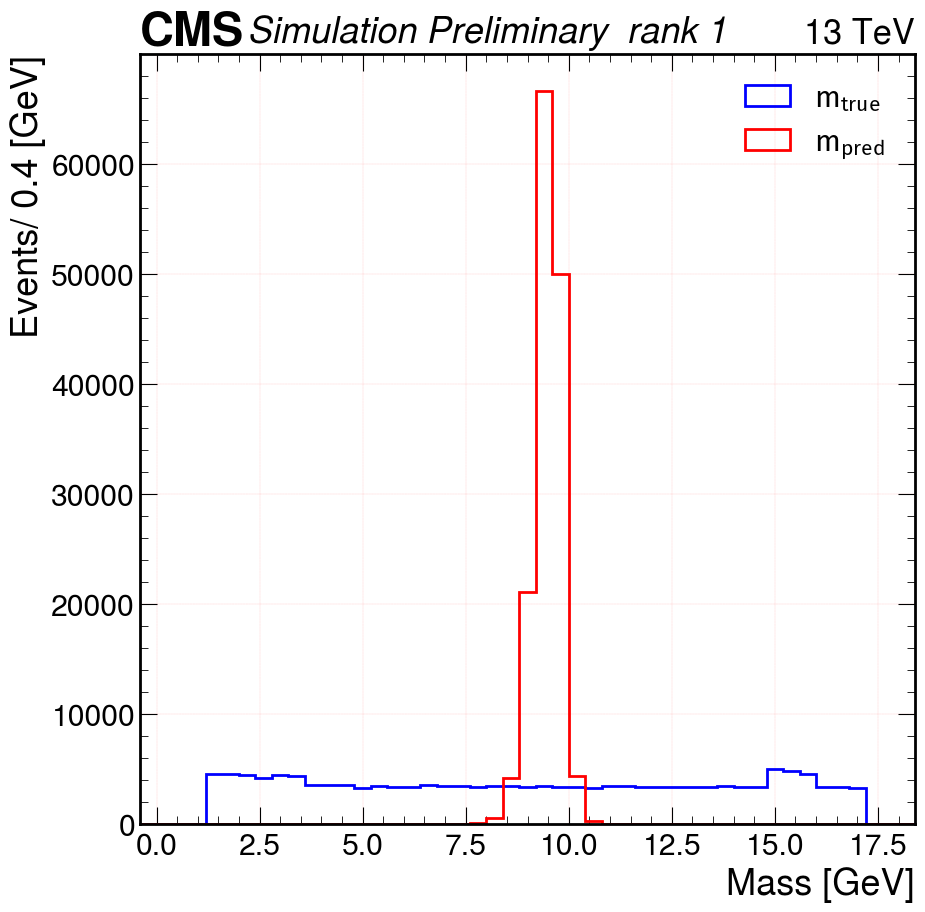

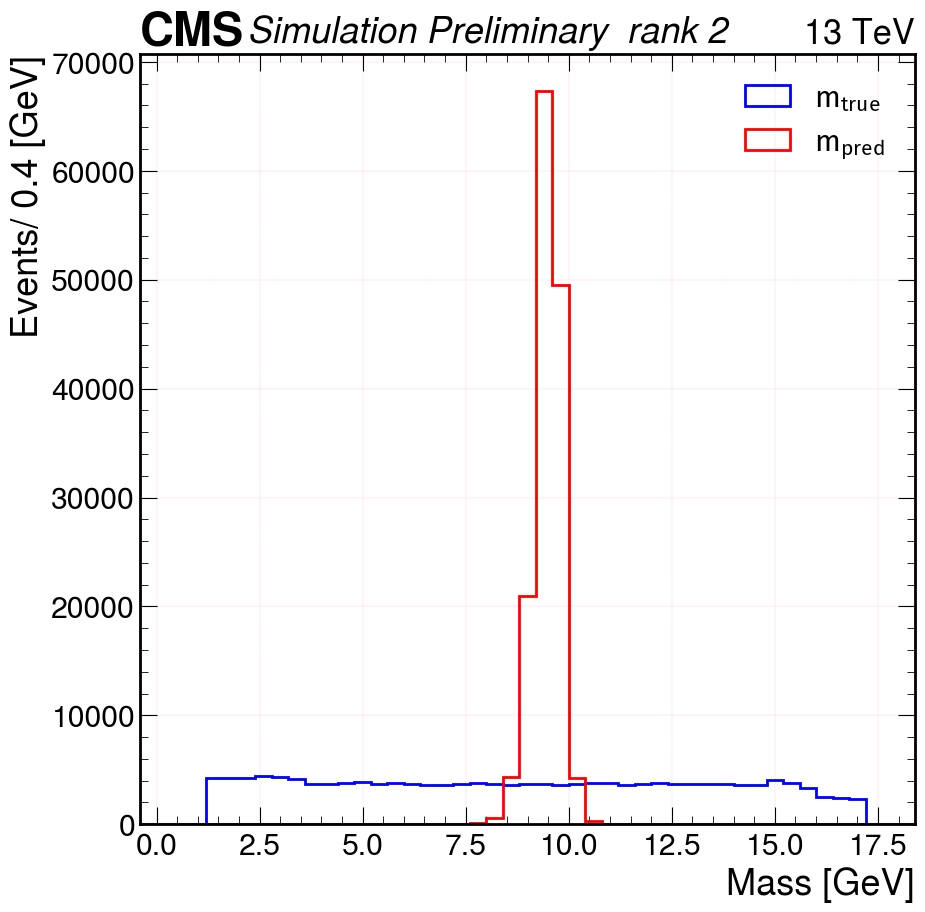

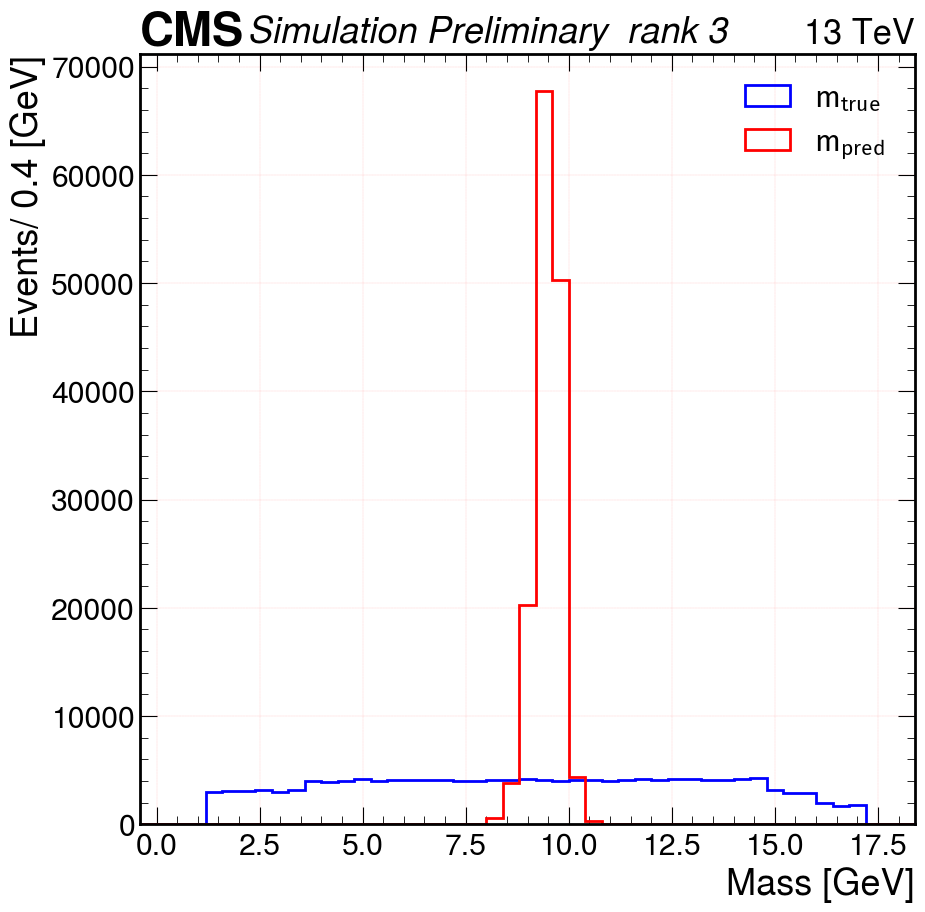

In [19]:
paths='/pscratch/sd/b/bbbam/trian_Valid_data_split_test_Nodes_1.0/13_channels_massregressor_multi_node_2024_07_20_19:17:53_GPUS_4'
assert len(paths) > 0
# print(f"{len(paths)} files found")

# for epoch in range(len(paths)):
epoch=1
 
for rank in range(4):
    data_file = glob.glob(f"{paths}/valid_data_epoch_{epoch}/Inference_data_valid_rank_{rank}_epoch_{epoch}.pkl")[0]
    infile = open(f"{data_file}", "rb")
    data = pickle.load(infile)
    infile.close()

    m_true_=data["m_true"]
    m_pred_=data["m_pred"]



    m0_min = 0.8
    m0_max = 17.2
    bin_size = 0.4
    fig, ax = plt.subplots()
    plt.hist(m_true_, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,bin_size)), histtype='step', label=r'$\mathrm{m_{true}}$', linestyle='-', color='blue', linewidth=2)
    plt.hist(m_pred_, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,bin_size)), histtype='step', label=r'$\mathrm{m_{pred}}$', linestyle='-', color='red', linewidth=2)
    plt.xlim(m0_min-1.2,m0_max+1.2)
    # plt.xticks(np.arange(m0_min-1.2,m0_max+1.2,.8),)
    plt.grid(color='r', linestyle='--', linewidth=.1)
    plt.xlabel('Mass [GeV]')
    plt.ylabel('Events/ 0.4 [GeV]')
    # plt.title(r'$\mathrm{m_{true}}$, $\mathrm{m_{pred}}$ masses',size=25)
    plt.legend(loc='upper right')
    hep.cms.label(llabel=f"Simulation Preliminary  rank {rank}", rlabel="13 TeV", loc=0, ax=ax)
    # plt.savefig('%s/%d_mtru_mpred_hist_full.png'%(out_dir, epoch), bbox_inches='tight',dpi=300, facecolor = "w")
    plt.show()

    



### Test train data splits across GPU

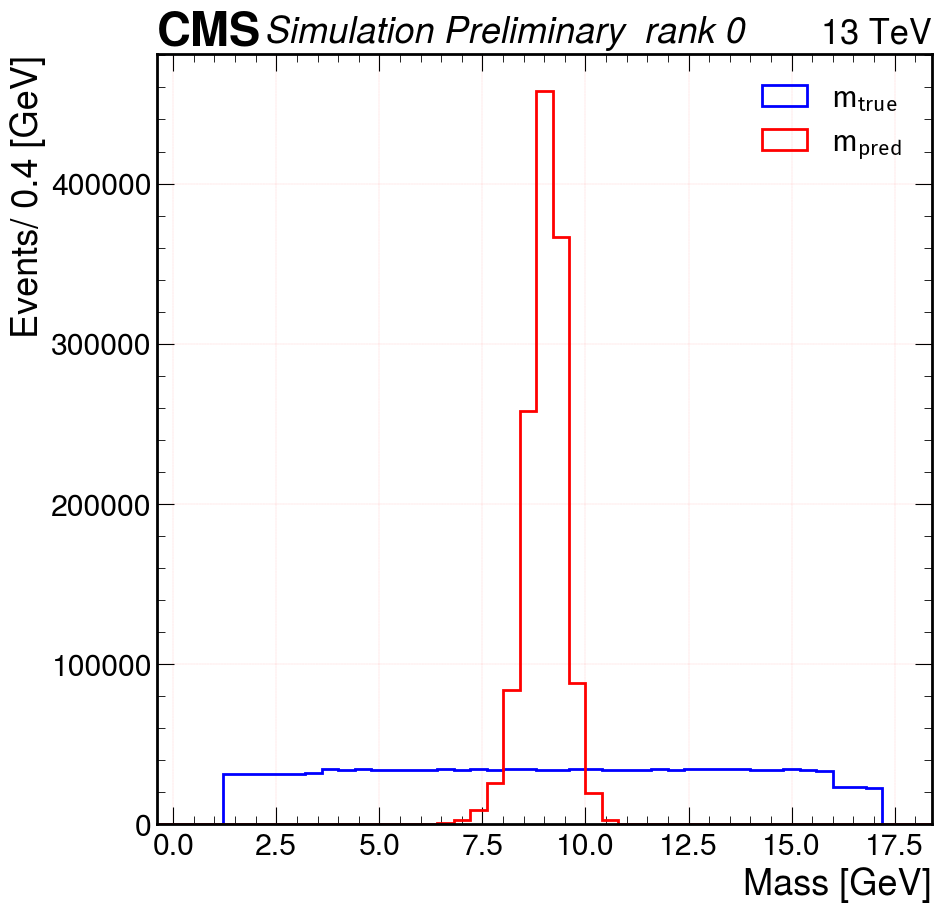

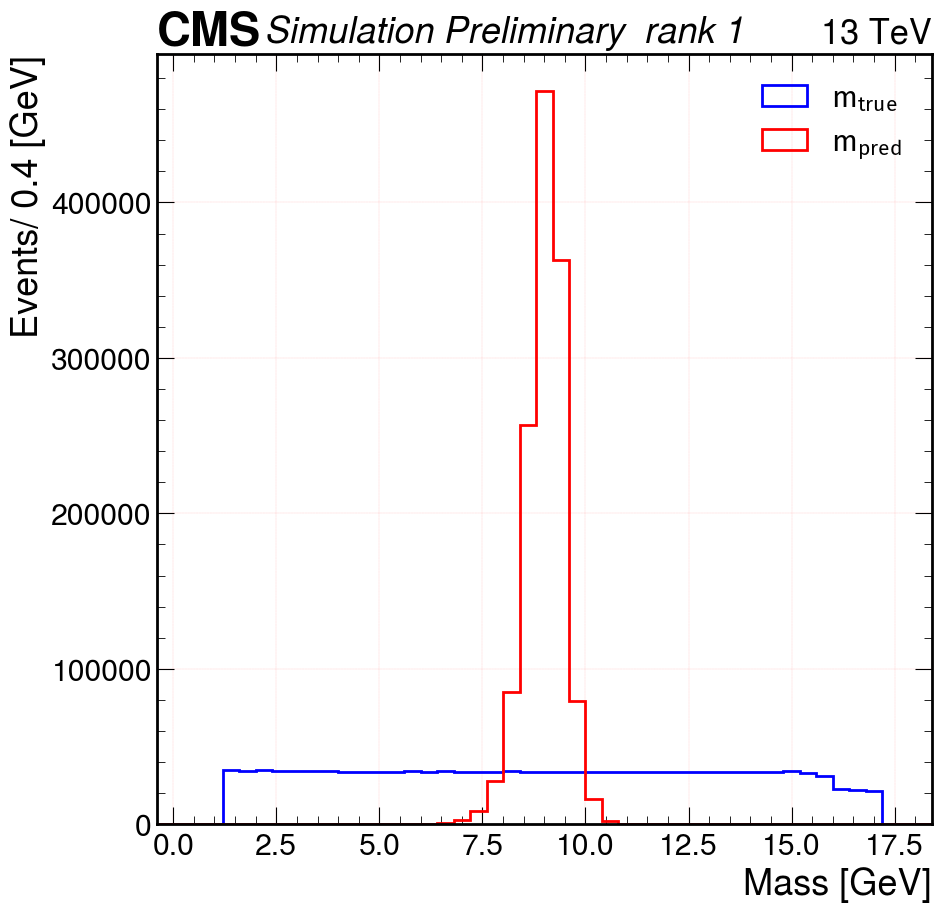

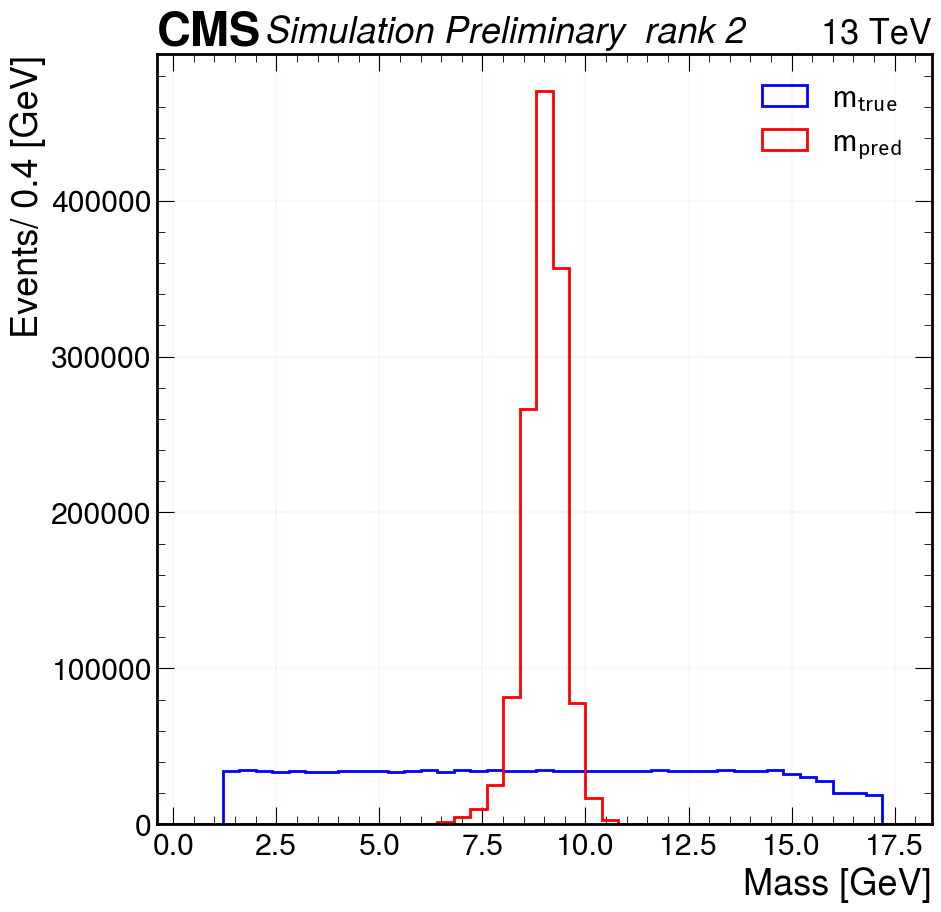

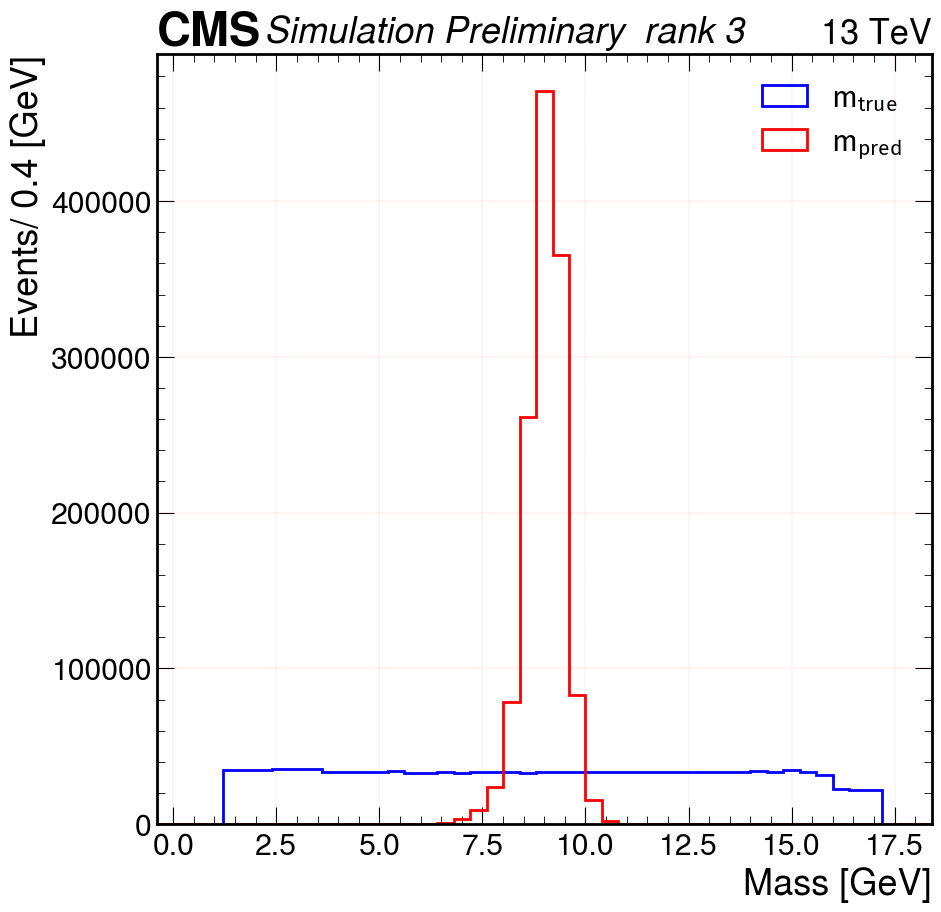

IndexError: list index out of range

In [20]:
paths='/pscratch/sd/b/bbbam/trian_Valid_data_split_test_Nodes_1.0/13_channels_massregressor_multi_node_2024_07_20_19:17:53_GPUS_4'
assert len(paths) > 0
# print(f"{len(paths)} files found")

# for epoch in range(len(paths)):
epoch=1
 
for rank in range(12):
    data_file = glob.glob(f"{paths}/train_data_epoch_{epoch}/Inference_data_train_rank_{rank}_epoch_{epoch}.pkl")[0]
    infile = open(f"{data_file}", "rb")
    data = pickle.load(infile)
    infile.close()

    m_true_=data["m_true"]
    m_pred_=data["m_pred"]



    m0_min = 0.8
    m0_max = 17.2
    bin_size = 0.4
    fig, ax = plt.subplots()
    plt.hist(m_true_, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,bin_size)), histtype='step', label=r'$\mathrm{m_{true}}$', linestyle='-', color='blue', linewidth=2)
    plt.hist(m_pred_, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,bin_size)), histtype='step', label=r'$\mathrm{m_{pred}}$', linestyle='-', color='red', linewidth=2)
    plt.xlim(m0_min-1.2,m0_max+1.2)
    # plt.xticks(np.arange(m0_min-1.2,m0_max+1.2,.8),)
    plt.grid(color='r', linestyle='--', linewidth=.1)
    plt.xlabel('Mass [GeV]')
    plt.ylabel('Events/ 0.4 [GeV]')
    # plt.title(r'$\mathrm{m_{true}}$, $\mathrm{m_{pred}}$ masses',size=25)
    plt.legend(loc='upper right')
    hep.cms.label(llabel=f"Simulation Preliminary  rank {rank}", rlabel="13 TeV", loc=0, ax=ax)
    # plt.savefig('%s/%d_mtru_mpred_hist_full.png'%(out_dir, epoch), bbox_inches='tight',dpi=300, facecolor = "w")
    plt.show()

    



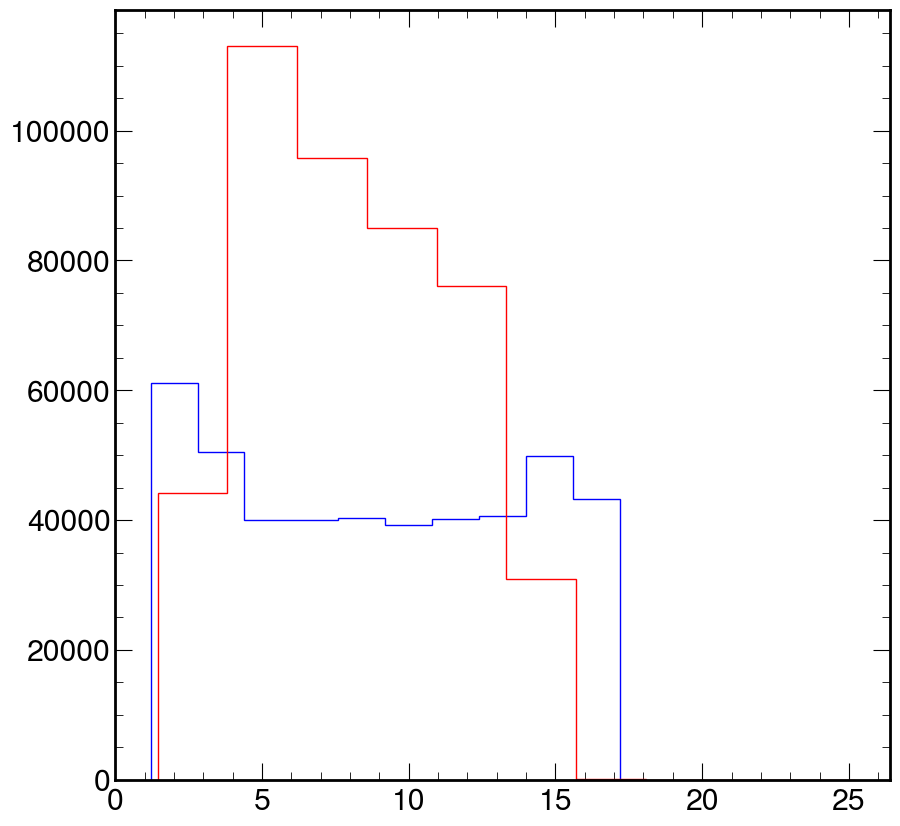

In [14]:

plt.hist(m_true_,  histtype='step', color='b')
plt.hist(m_pred_,  histtype='step', color='r')

plt.show()

In [15]:
# m_pred_ = 17.2*sigmoid(m_pred_/17.2)
# plt.hist(m_true_,  histtype='step', color='b')
# plt.hist(m_pred_,  histtype='step', color='r')

In [9]:
paths=np.sort(glob.glob(f'/pscratch/sd/b/bbbam/resnet34_modi_final_Model_testing_Nodes_1.0/13_channels_massregressor_multi_node_inference_Mass_*/test_data_epoch_73/*'))
paths

array(['/pscratch/sd/b/bbbam/resnet34_modi_final_Model_testing_Nodes_1.0/13_channels_massregressor_multi_node_inference_Mass_12_2024_07_16_13:47:59_GPUS_4/test_data_epoch_73/Inference_data_test_rank_0_epoch_73_M3p7.pkl',
       '/pscratch/sd/b/bbbam/resnet34_modi_final_Model_testing_Nodes_1.0/13_channels_massregressor_multi_node_inference_Mass_12_2024_07_16_13:47:59_GPUS_4/test_data_epoch_73/Inference_data_test_rank_1_epoch_73_M3p7.pkl',
       '/pscratch/sd/b/bbbam/resnet34_modi_final_Model_testing_Nodes_1.0/13_channels_massregressor_multi_node_inference_Mass_12_2024_07_16_13:47:59_GPUS_4/test_data_epoch_73/Inference_data_test_rank_2_epoch_73_M3p7.pkl',
       '/pscratch/sd/b/bbbam/resnet34_modi_final_Model_testing_Nodes_1.0/13_channels_massregressor_multi_node_inference_Mass_12_2024_07_16_13:47:59_GPUS_4/test_data_epoch_73/Inference_data_test_rank_3_epoch_73_M3p7.pkl',
       '/pscratch/sd/b/bbbam/resnet34_modi_final_Model_testing_Nodes_1.0/13_channels_massregressor_multi_node_infere

# for testing signal

3.7
16 files found
true mass 3.7000005


(exptext: Custom Text(0.0, 1, 'CMS'),
 expsuffix: Custom Text(0.0, 1.005, 'Simulation Preliminary'))

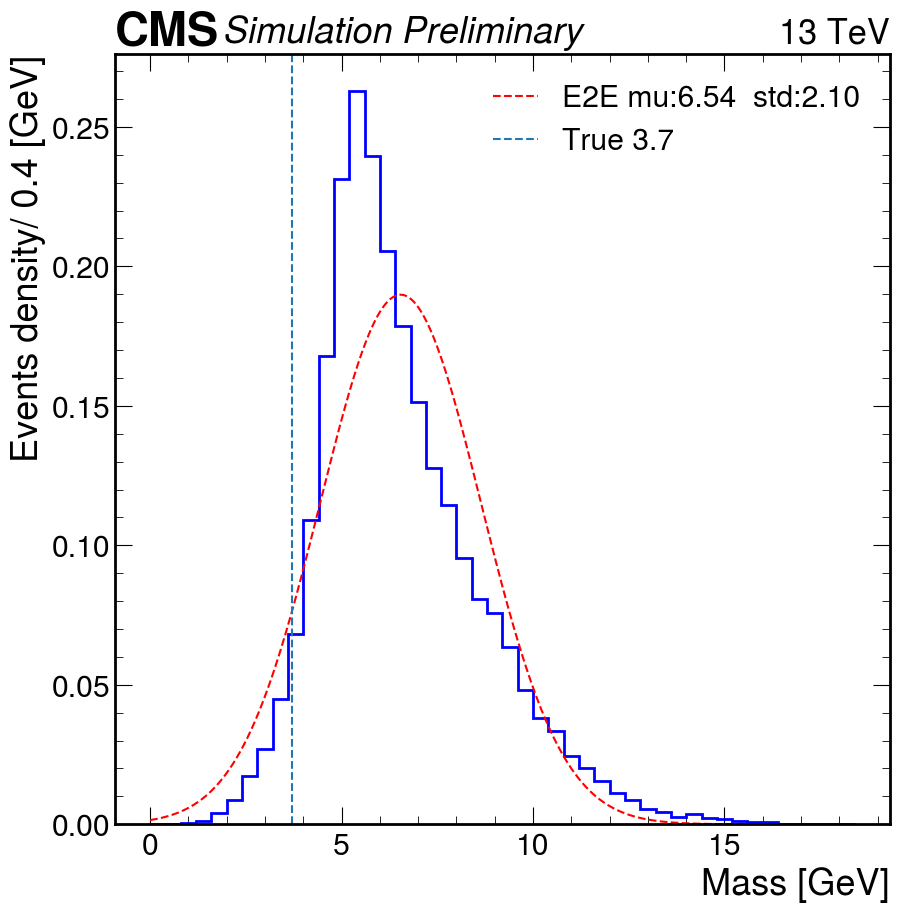

In [4]:
Mass = '3p7'
mass  = {'3p7':3.7,'4':4, '5':5, '6':6, '8':8, '10':10, '12':12, '14':14}.get(Mass, None)
print(mass)
paths=np.sort(glob.glob(f'/pscratch/sd/b/bbbam/ResNet_old_no_ep_Nodes_4.0/13_channels_massregressor_multi_node_2024_07_26_20:51:58_GPUS_16/test_data_epoch_200/*'))
assert len(paths) > 0
print(f"{len(paths)} files found")
# epoch=6
m_true_ =[]
m_pred_ =[]

for data_file in paths:
    infile = open(f"{data_file}", "rb")
    data = pickle.load(infile)
    # print(f"loaded data file ------>  {data_file}")
    infile.close()

    m_true_.append( data["m_true"])
    m_pred_.append( data["m_pred"])
m_true_ = np.concatenate(m_true_)
m_pred_ = np.concatenate(m_pred_)  
print("true mass", np.mean(m_true_))
# data_file = paths[0]
# infile = open(f"{data_file}", "rb")
# data = pickle.load(infile)
# print(f"loaded data file ------>  {data_file}")
# infile.close()

# m_true_ = data["m_true"]
# m_pred_ = data["m_pred"]

m0 = 1.2
m0_max = 17.2
bin_size=0.4
mu, std = norm.fit(m_pred_)
x = np.linspace(0,m0_max+1.2, num=1000)
y = norm.pdf(x, mu, std)

fig, ax = plt.subplots()
plt.hist(np.array(m_pred_).flatten(),density=True, range=(0,m0_max+1.2), bins=len(np.arange(0,m0_max+1.2,bin_size)), histtype='step',  linestyle='-', color='b', linewidth=2)
plt.plot(x, y,linestyle='--', color='red',label=f'E2E mu:{mu:.2f}  std:{std:.2f}')
plt.axvline(x= mass,linestyle='--',label=f'True {mass}')
plt.xlabel('Mass [GeV]')
plt.ylabel('Events density/ 0.4 [GeV]')
plt.legend(loc='upper right')
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
# plt.savefig('%s/%d_mt

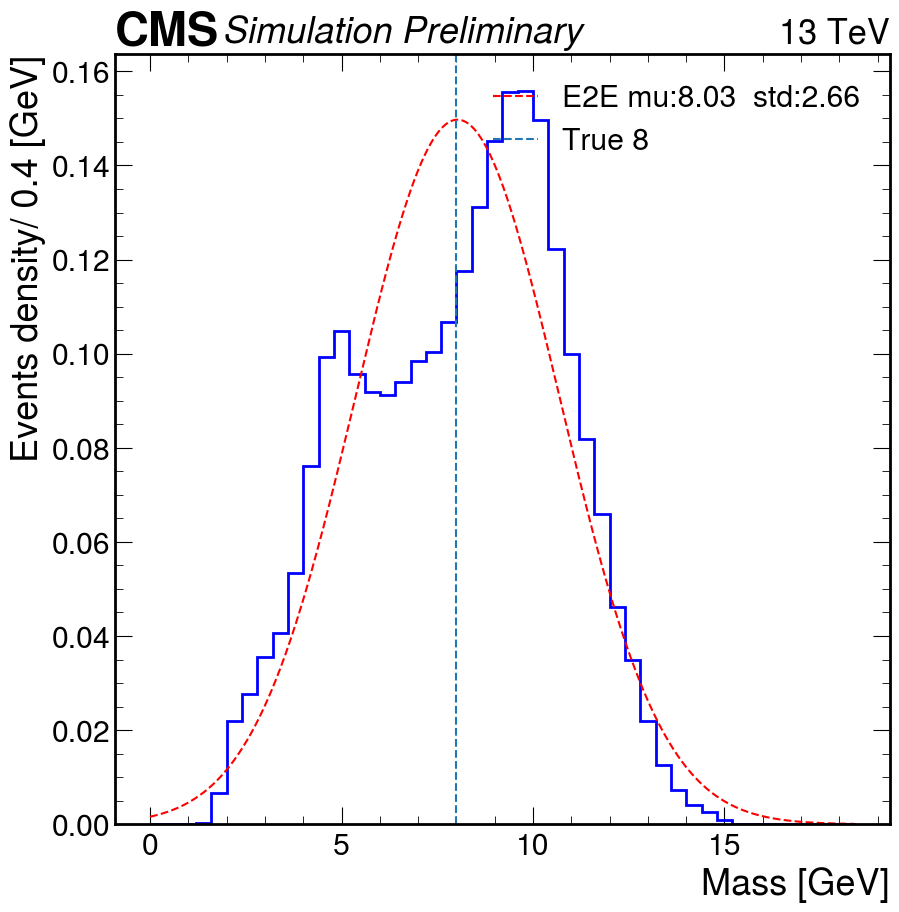

In [71]:
# mass = 3.7
ru_mpred_hist_full.png'%(out_dir, epoch), bbox_inches='tight',dpi=300, facecolor = "w")
plt.show()

In [59]:
Mass = '3p7'
mass  = {'3p7':3.7,'4':4, '5':5, '6':6, '8':8, '10':10, '12':12, '14':14}.get(Mass, None)
print(mass)
inf_data = glob.glob(f"/global/homes/b/bbbam/ResNet_reg/13_ch_massregressor_ResNet/INFERENCE_DATA_test/Mass_{mass}_*")
print(inf_data[0])
infile = open(f"{inf_data[0]}", "rb")
data = pickle.load(infile)
infile.close()

m_true_=(data["m_true"])
m_pred_=(data["m_pred"])

m_pred_1 =[]
m_pred_2 =[]
for i in range(len(m_pred_)):
    # if i==0: continue
    if i%2: m_pred_1.append(m_pred_[i])
    else: m_pred_2.append(m_pred_[i])
m0_min = 0.8
m0_max = 17.2
bin_size = 0.4
fig, ax = plt.subplots(figsize=(15,12), dpi=150)
plt.hist2d(np.squeeze(m_pred_1), np.squeeze(m_pred_2), bins=[np.arange(m0_min-0.8, m0_max+1.2, .4), np.arange(m0_min-0.8, m0_max+1.2, .4)],cmap=cms_cmap)
plt.xlabel(r'$\mathrm{A_{1}}$ [GeV]')
plt.ylabel(r'$\mathrm{A_{2}}$ [GeV]')
plt.plot((m0_min-1.2, m0_max+1.2), (m0_min-1.2, m0_max+1.2), color='r', linestyle='--', alpha=0.9)
# plt.xticks(np.arange(m0_min-0.8, m0_max+1.2, .8),size=12)
# plt.yticks(np.arange(m0_min-0.8, m0_max+1.2, .8),size=12)
plt.colorbar().set_label(label='Events/ {0.4, 0.4} [GeV]' )
plt.grid(color='r', linestyle='--', linewidth=.4)
hep.cms.label(llabel=f"Simulation Preliminary A Mass {mass} GeV", rlabel="13 TeV", loc=0, ax=ax)
plt.savefig(f'A_Mass_{mass} GeV.png', bbox_inches='tight',dpi=300, facecolor = "w")
plt.show()    

3.7
/global/homes/b/bbbam/ResNet_reg/13_ch_massregressor_ResNet/INFERENCE_DATA_test/Mass_3.7_epoch6__mae2.0021_inference_data.pkl


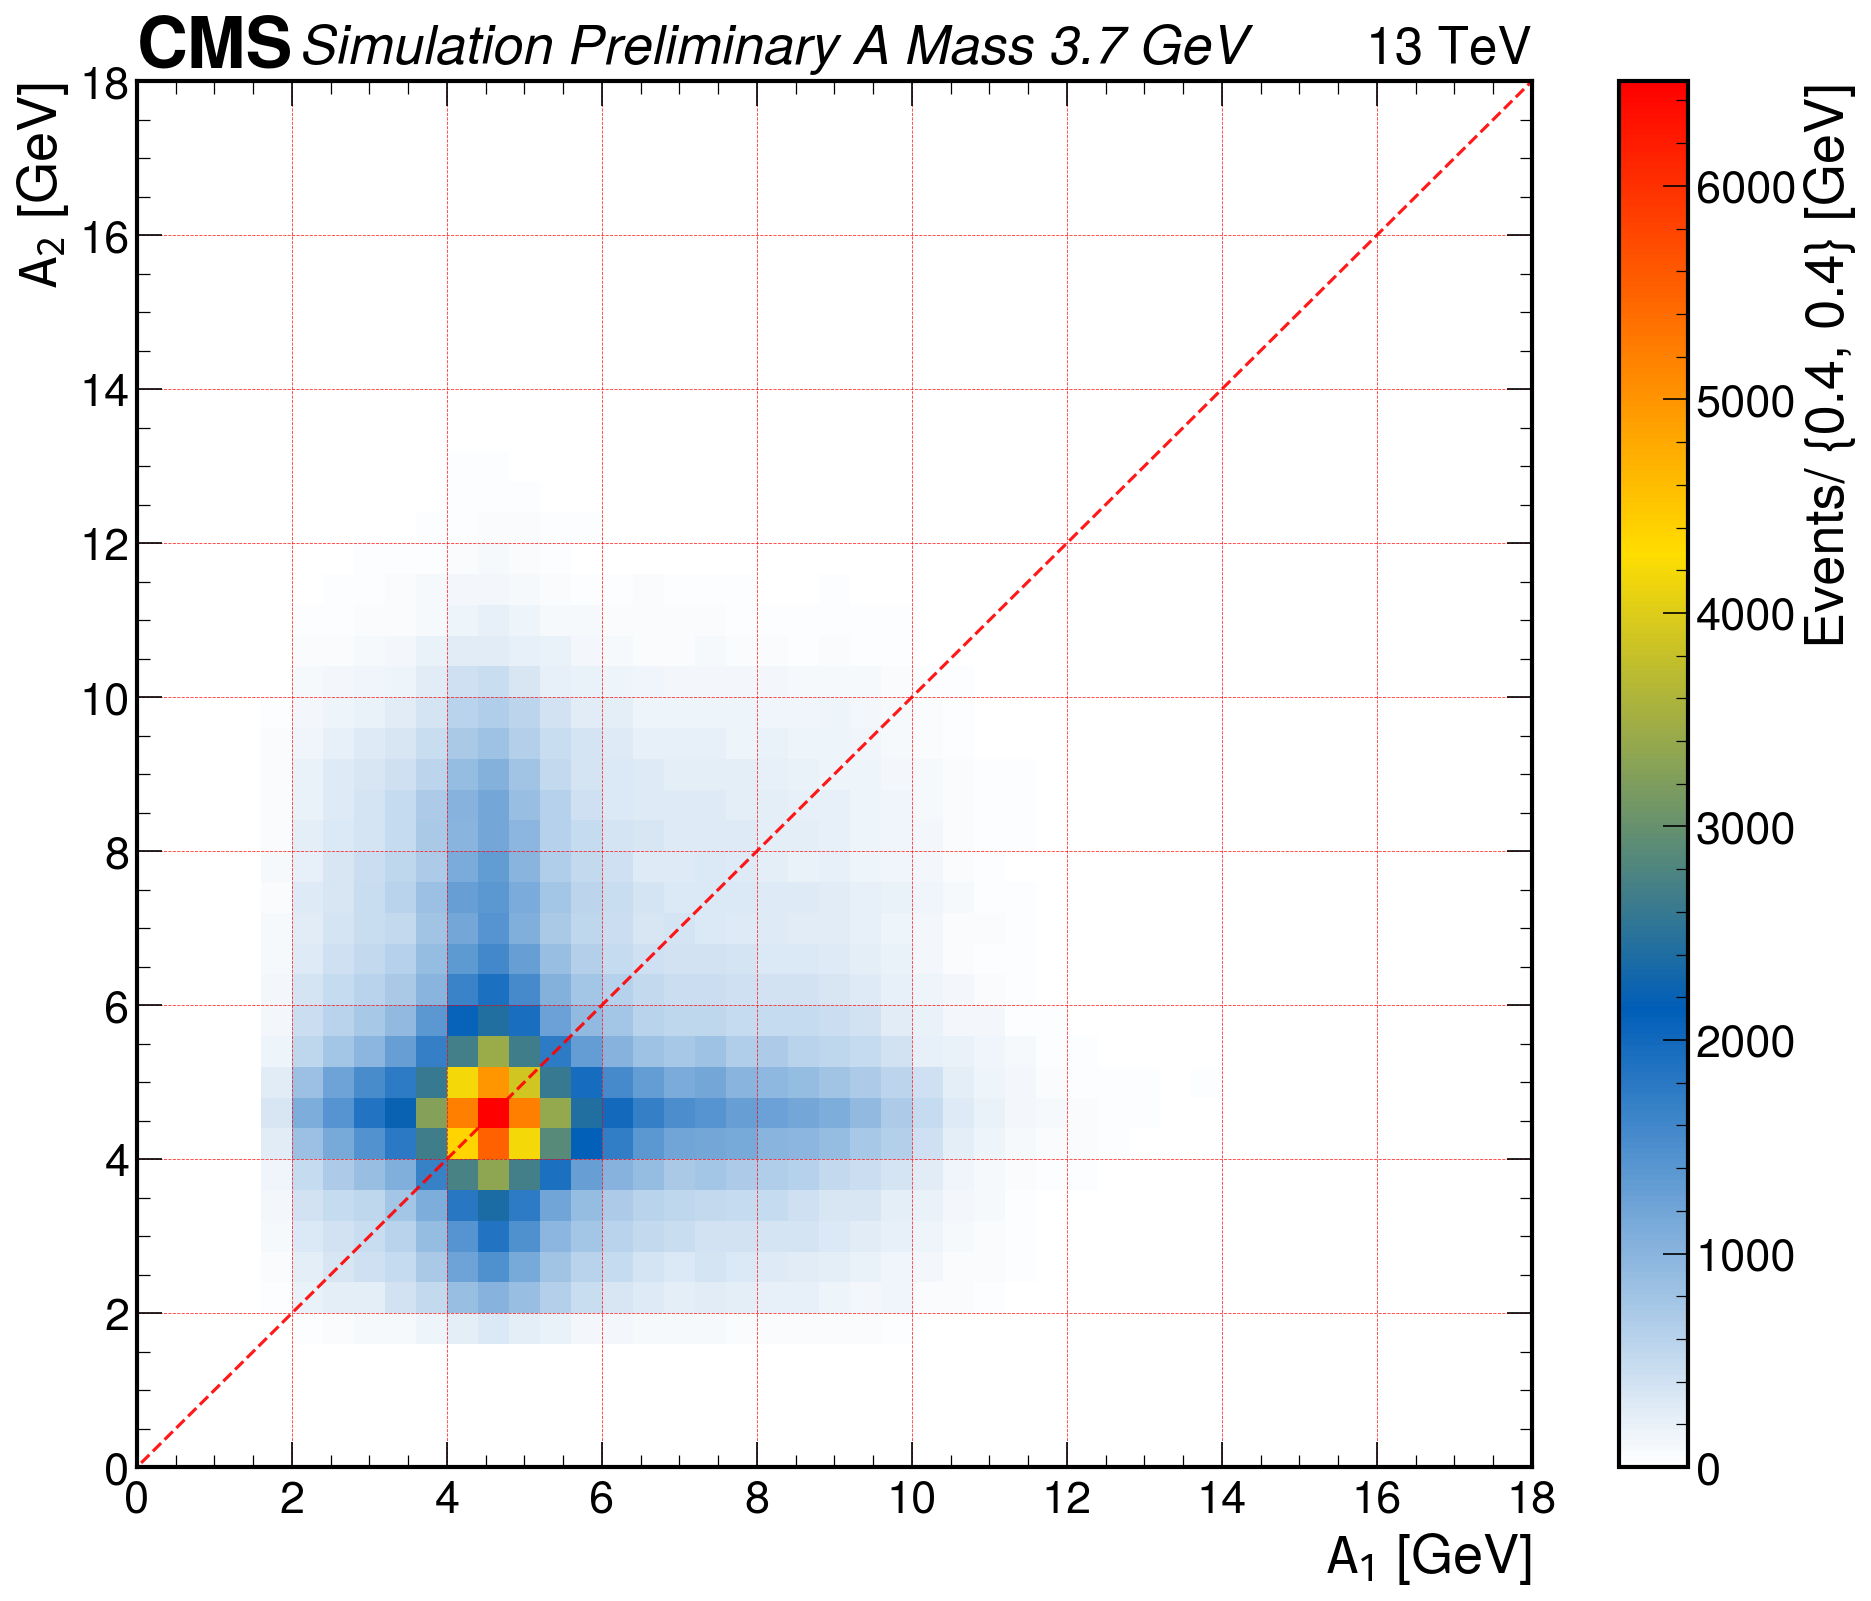

In [22]:
m_true_

array([[3.6999981],
       [3.699998 ],
       [3.700001 ],
       ...,
       [3.7000046],
       [3.6999998],
       [3.6999998]], dtype=float32)

In [24]:
2%2

0